In [12]:
!pip install shap


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install lime


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install boruta


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import StackingClassifier

import shap
import lime
import lime.lime_tabular

from boruta import BorutaPy


In [16]:

df = pd.read_csv("PCOS_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (541, 44)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [17]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing Values After Imputation:\n", df.isnull().sum().sum())


Missing Values After Imputation:
 0


In [18]:

print(df.columns.tolist())


['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [19]:

target_col = "PCOS (Y/N)"


drop_cols = ["Sl. No", "Patient File No."]
X = df.drop(columns=[target_col] + drop_cols)
y = df[target_col]

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Boruta Selected Features: ['Cycle(R/I)', 'Cycle length(days)', 'LH(mIU/mL)', 'FSH/LH', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']


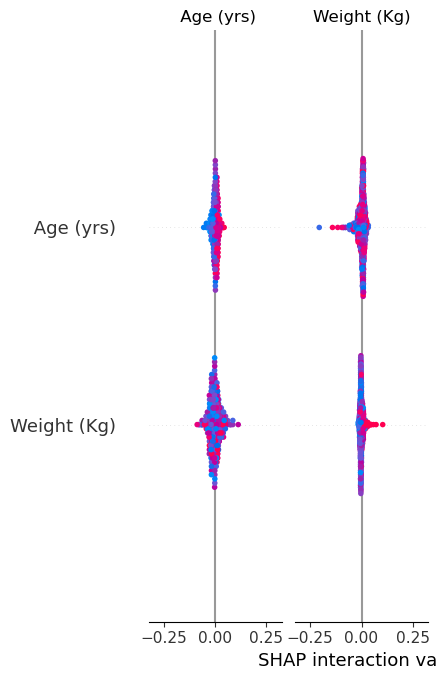

SHAP Top Features: ["Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index(['Weight (Kg)', ' Age (yrs)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index(['Weight (Kg)', ' Age (yrs)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index(['Weight (Kg)', ' Age (yrs)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')", "Index([' Age (yrs)', 'Weight (Kg)'], dtype='object')"]
No overlap found. Using Boruta features as final set.
Final Stable Features: ['Cycle(R/I)', 'Cycle length(days)', 'LH(mIU/mL)', 'FSH/LH', 'A

In [20]:
# Cell 5: Feature Selection using Boruta + SHAP
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

boruta_selector.fit(X_scaled.values, y.values)

# Boruta features -> list
boruta_features = X_scaled.columns[boruta_selector.support_].tolist()
print("Boruta Selected Features:", boruta_features)

# SHAP feature importance
explainer = shap.TreeExplainer(rf.fit(X_scaled, y))
shap_values = explainer.shap_values(X_scaled)

shap.summary_plot(shap_values, X_scaled, plot_type="bar")

# SHAP top 15 features -> list
shap_importance = np.mean(np.abs(shap_values), axis=0)
shap_features = [X_scaled.columns[i] for i in np.argsort(shap_importance)[-15:]]
shap_features = [str(f) for f in shap_features]   # force list of strings
print("SHAP Top Features:", shap_features)

# Final intersection (Boruta ∩ SHAP)
final_features = list(set(boruta_features) & set(shap_features))

# Safety fallback
if len(final_features) == 0:
    print("No overlap found. Using Boruta features as final set.")
    final_features = boruta_features

print("Final Stable Features:", final_features)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled[final_features], y, test_size=0.2, stratify=y, random_state=42
)


In [22]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42))
]

meta_learner = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=500, random_state=42)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss', gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              impo...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42,
                                              reg_alpha=None, reg_lambda=None, ...)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(32, 16),
                                                 max_iter=500,
                                                 random_state=42),
                   n_jobs=-1)

In [23]:
y_pred = stack_model.predict(X_test)
y_proba = stack_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.908256880733945
Precision: 0.8611111111111112
Recall: 0.8611111111111112
F1 Score: 0.8611111111111112
ROC-AUC: 0.9668949771689497

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.86      0.86      0.86        36

    accuracy                           0.91       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109



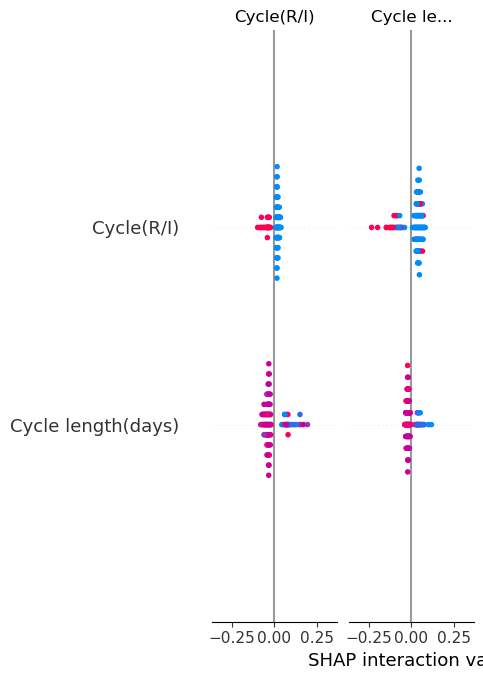

In [24]:
# Extract base models from stacking classifier
rf_model = stack_model.named_estimators_['rf']
xgb_model = stack_model.named_estimators_['xgb']
svm_model = stack_model.named_estimators_['svm']

# SHAP for Random Forest
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap = rf_explainer.shap_values(X_test)

shap.summary_plot(rf_shap, X_test, feature_names=X_test.columns, show=True)


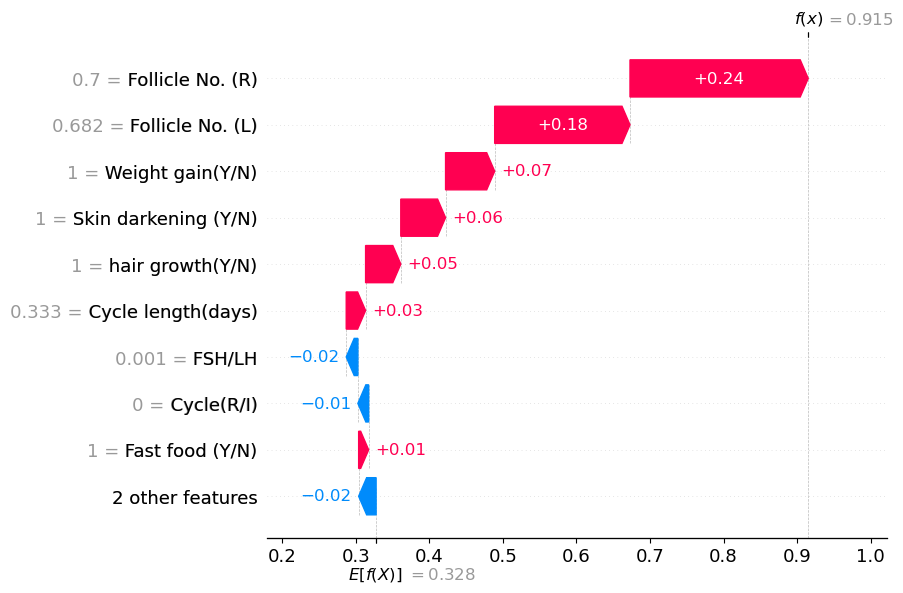

In [25]:
# Local SHAP explanation on RF (PCOS = positive class)
rf_model = stack_model.named_estimators_['rf']
rf_explainer = shap.TreeExplainer(rf_model)

sample_idx = 5
sample = X_test.iloc[[sample_idx]]

sample_shap = rf_explainer(sample, check_additivity=False)

shap.plots.waterfall(sample_shap[0, :, 1])


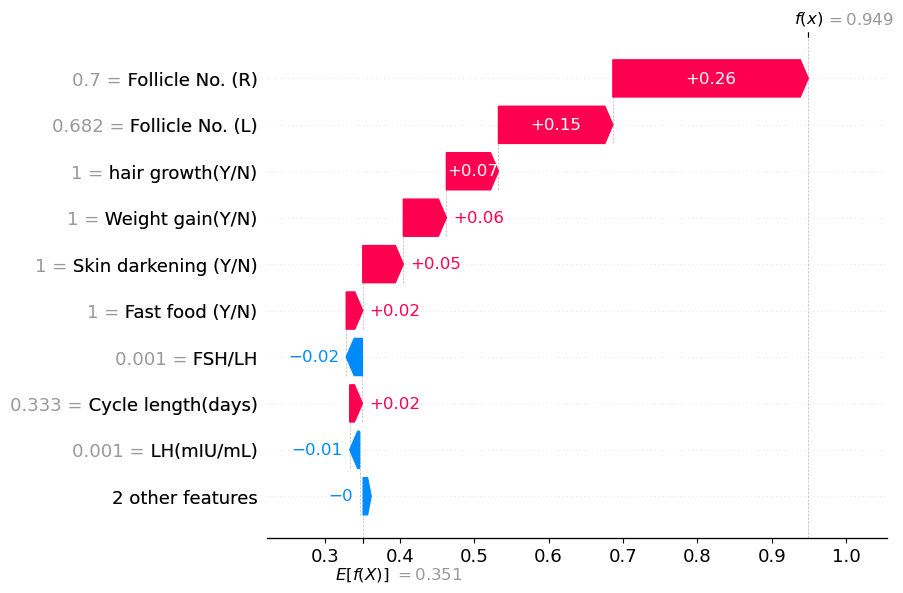

In [26]:
# Cell 11 - Local SHAP for entire Stacking Model (final PCOS prediction)

# Wrap the stack model using Kernel SHAP (works with any model)
stack_explainer = shap.Explainer(stack_model.predict_proba, X_train, feature_names=X_train.columns)

# Choose a sample to explain (same as before for consistency)
sample_idx = 5
sample = X_test.iloc[[sample_idx]]

# Get SHAP values
sample_shap_stack = stack_explainer(sample)

# Waterfall plot for the positive class (PCOS = 1)
shap.plots.waterfall(sample_shap_stack[0, :, 1])


In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(stack_model, X, y, cv=cv, scoring="roc_auc")

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Std ROC-AUC:", cv_scores.std())


Cross-Validation ROC-AUC Scores: [0.945586   0.94677104 0.96125245 0.97260274 0.96604938]
Mean ROC-AUC: 0.9584523205527772
Std ROC-AUC: 0.010656313470715398


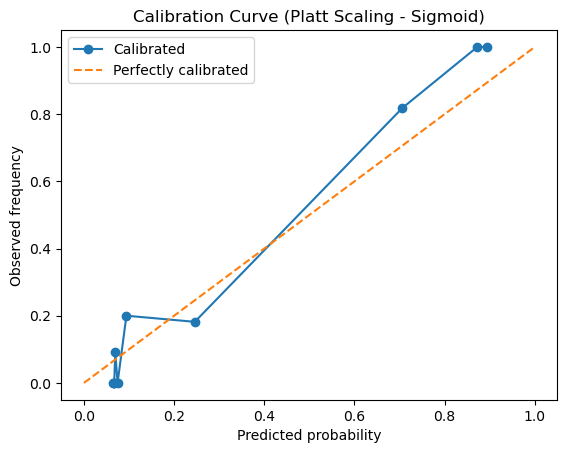

In [28]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt

# Use "estimator" instead of "base_estimator"
calibrated_model = CalibratedClassifierCV(estimator=stack_model, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)

# Get calibrated probabilities
y_prob = calibrated_model.predict_proba(X_test)[:, 1]

# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10, strategy='quantile')

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label="Calibrated")
plt.plot([0, 1], [0, 1], "--", label="Perfectly calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Observed frequency")
plt.title("Calibration Curve (Platt Scaling - Sigmoid)")
plt.legend()
plt.show()


Confusion Matrix:
 [[68  5]
 [ 5 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.86      0.86      0.86        36

    accuracy                           0.91       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109



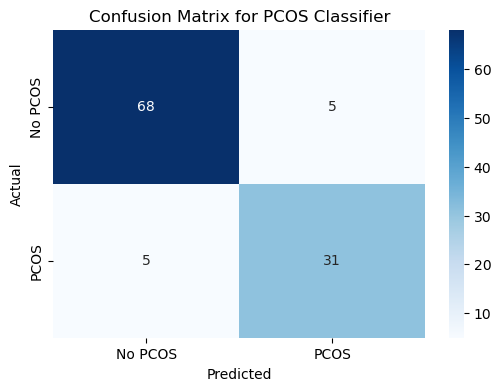

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming:
# y_test → true labels
# y_pred → model predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for PCOS Classifier")
plt.show()


In [30]:
# ------------------------------
# IMPORTS
# ------------------------------
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# ------------------------------
# SCALER
# ------------------------------
scaler = StandardScaler()

# ------------------------------
# BASE LEARNERS
# ------------------------------
# Random Forest
rf_params = {
    'n_estimators': [200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost
xgb_params = {
    'n_estimators': [200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_params, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# SVM
svm_params = {
    'C': [1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42),
                        svm_params, cv=5, n_jobs=-1, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# ------------------------------
# META LEARNER
# ------------------------------
mlp_params = {
    'hidden_layer_sizes': [(32,16), (64,32)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42),
                        mlp_params, cv=5, n_jobs=-1, scoring='accuracy')
# Note: stacking automatically creates meta features from base learners
best_mlp = mlp_grid.best_estimator_ if 'X_train_meta' in locals() else MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000, random_state=42)

# ------------------------------
# STACKING CLASSIFIER
# ------------------------------
stack_model = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('svm', best_svm)
    ],
    final_estimator=best_mlp,
    cv=5,
    n_jobs=-1
)

# ------------------------------
# PIPELINE WITH SCALER
# ------------------------------
pipeline = Pipeline([
    ('scaler', scaler),
    ('stack', stack_model)
])

# ------------------------------
# FIT MODEL
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# EVALUATE
# ------------------------------
accuracy = pipeline.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy: {accuracy*100:.2f}%")


Stacking Ensemble Accuracy: 92.66%


In [31]:
# ------------------------------
# IMPORTS
# ------------------------------
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# ------------------------------
# DATA SPLIT (replace with your dataset)
# ------------------------------
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# SCALER
# ------------------------------
scaler = StandardScaler()

# ------------------------------
# BASE LEARNERS
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                             rf_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost
xgb_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_grid = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
                              xgb_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# SVM
svm_params = {
    'C': [1, 10, 50],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}
svm_grid = RandomizedSearchCV(SVC(probability=True, random_state=42),
                              svm_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# ------------------------------
# META LEARNER (MLP)
# ------------------------------
mlp_params = {
    'hidden_layer_sizes': [(64,32), (32,16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}
mlp_grid = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42),
                              mlp_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp = mlp_grid.best_estimator_

# ------------------------------
# STACKING CLASSIFIER
# ------------------------------
stack_model = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('svm', best_svm)
    ],
    final_estimator=best_mlp,
    cv=cv,
    n_jobs=-1,
    passthrough=True  # include original features for meta learner
)

# ------------------------------
# PIPELINE WITH SCALER
# ------------------------------
pipeline = Pipeline([
    ('scaler', scaler),
    ('stack', stack_model)
])

# ------------------------------
# FIT MODEL
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# EVALUATE
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Stacking Ensemble Accuracy: {accuracy*100:.2f}%")


Optimized Stacking Ensemble Accuracy: 91.74%


Confusion Matrix:
[[69  4]
 [ 5 31]]


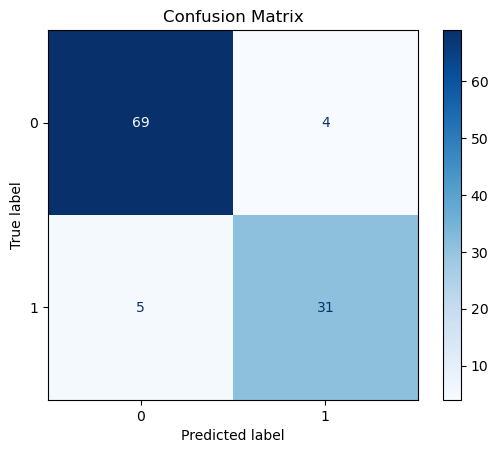

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.89      0.86      0.87        36

    accuracy                           0.92       109
   macro avg       0.91      0.90      0.91       109
weighted avg       0.92      0.92      0.92       109



In [32]:
# ------------------------------
# IMPORTS
# ------------------------------
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ------------------------------
# PREDICTIONS
# ------------------------------
y_pred = pipeline.predict(X_test)

# ------------------------------
# CONFUSION MATRIX
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# CLASSIFICATION REPORT
# ------------------------------
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Optimized Stacking Ensemble Accuracy: 91.74%

Confusion Matrix:
 [[69  4]
 [ 5 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.89      0.86      0.87        36

    accuracy                           0.92       109
   macro avg       0.91      0.90      0.91       109
weighted avg       0.92      0.92      0.92       109



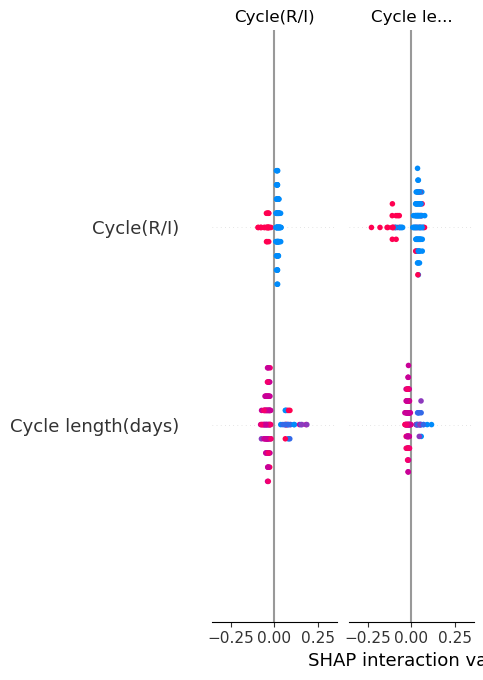

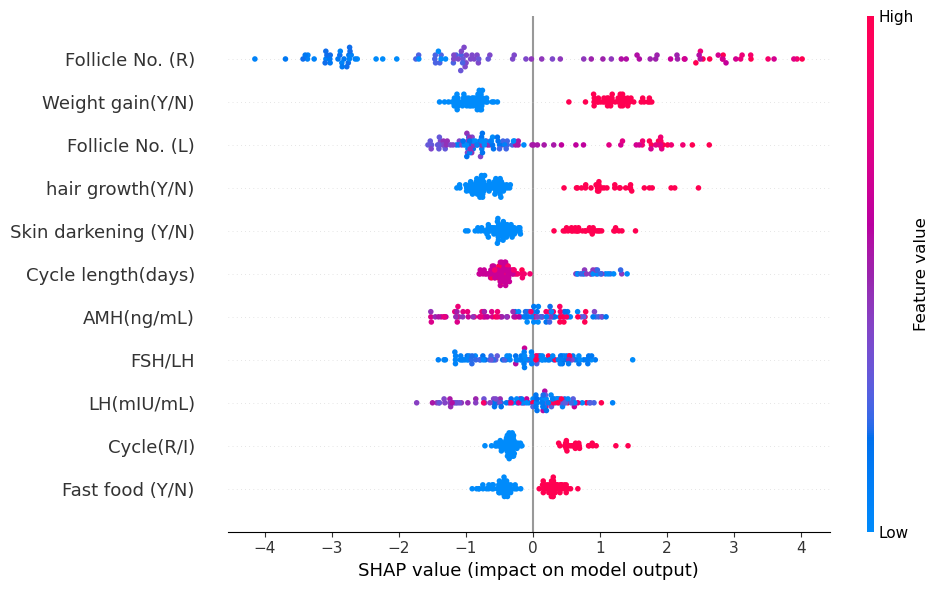

  0%|          | 0/50 [00:00<?, ?it/s]

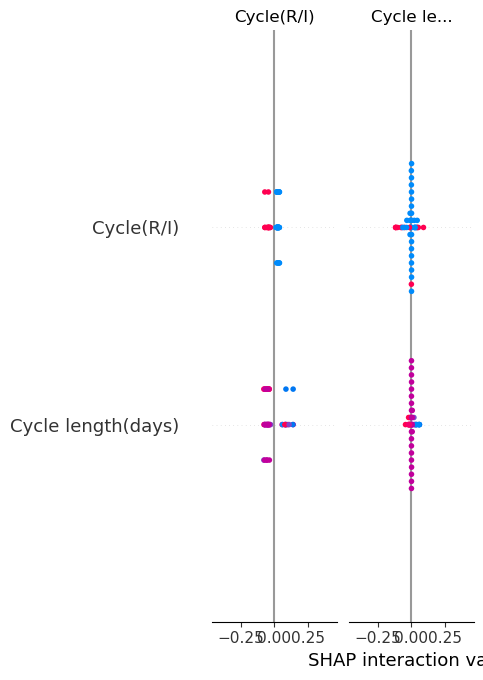

Provided model function fails when applied to the provided data set.


ValueError: X has 14 features, but MLPClassifier is expecting 11 features as input.

In [33]:
# ------------------------------
# IMPORTS
# ------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# ------------------------------
# DATA SPLIT (replace with your dataset)
# ------------------------------
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train, columns=X_train.columns if hasattr(X_train, 'columns') else [f'feat_{i}' for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=X_train.columns)

# ------------------------------
# SCALER
# ------------------------------
scaler = StandardScaler()

# ------------------------------
# BASE LEARNERS
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                             rf_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost
xgb_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_grid = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
                              xgb_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# SVM
svm_params = {
    'C': [1, 10, 50],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}
svm_grid = RandomizedSearchCV(SVC(probability=True, random_state=42),
                              svm_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# ------------------------------
# META LEARNER (MLP)
# ------------------------------
mlp_params = {
    'hidden_layer_sizes': [(64,32), (32,16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}
mlp_grid = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42),
                              mlp_params, n_iter=5, cv=cv, n_jobs=-1, scoring='accuracy', random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp = mlp_grid.best_estimator_

# ------------------------------
# STACKING CLASSIFIER
# ------------------------------
stack_model = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('svm', best_svm)
    ],
    final_estimator=best_mlp,
    cv=cv,
    n_jobs=-1,
    passthrough=True  # include original features for meta learner
)

# ------------------------------
# PIPELINE WITH SCALER
# ------------------------------
pipeline = Pipeline([
    ('scaler', scaler),
    ('stack', stack_model)
])

# ------------------------------
# FIT MODEL
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# EVALUATE
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Stacking Ensemble Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# DUAL-LEVEL XAI WITH SHAP
# ------------------------------

# --- 1. Base Learners ---
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns, show=True, plot_size=(10,6))

explainer_xgb = shap.TreeExplainer(best_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns, show=True, plot_size=(10,6))

# SVM (Kernel Explainer)
explainer_svm = shap.KernelExplainer(best_svm.predict_proba, shap.sample(X_train, 50))
shap_values_svm = explainer_svm.shap_values(X_test.iloc[:50])
shap.summary_plot(shap_values_svm, X_test.iloc[:50], feature_names=X_test.columns, show=True, plot_size=(10,6))

# --- 2. Meta Learner ---
# Get exact input for meta-learner
meta_features = stack_model.transform(X_test)  # shape matches MLP input
meta_input_df = pd.DataFrame(meta_features)

# Explain meta-learner
explainer_meta = shap.KernelExplainer(best_mlp.predict_proba, shap.sample(meta_input_df, 50))
shap_values_meta = explainer_meta.shap_values(meta_input_df.iloc[:50])
shap.summary_plot(shap_values_meta, meta_input_df.iloc[:50], show=True, plot_size=(10,6))

# ------------------------------
# XAI WITH LIME (Optional for single instance)
# ------------------------------
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)
i = 0  # first test instance
exp = explainer_lime.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=pipeline.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True)


In [34]:
# Suppose X_train.columns contains exactly these 30 features used in training
# Map your patient row to those features

patient_values = [[
    37, 65, 148, 29.7, 13, 72, 20, 12, 2, 5, 4, 0, 0, 1.99, 1.99, 8.06, 2.36, 3.42,
    42, 36, 0.86, 16.41, 1.22, 36.9, 33.4, 0.36, 76, 0, 0, 0
]]

X_patient = pd.DataFrame(patient_values, columns=X_train.columns)


ValueError: 11 columns passed, passed data had 30 columns

In [36]:
y_pred_patient = pipeline.predict(X_patient)
y_prob_patient = pipeline.predict_proba(X_patient)


NameError: name 'X_patient' is not defined

In [38]:
print("Predicted PCOS (Y/N):", y_pred_patient[0])
print("Probability for each class:", y_prob_patient[0])

NameError: name 'y_pred_patient' is not defined

In [40]:
import pandas as pd

# Full patient row as list of values
patient_full_row = [4, 4, 4, 0, 37, 65, 148, 29.7, 13, 72, 20, 12, 2, 5, 4, 0, 0, 1.99, 1.99,
                    8.06, 2.36, 3.42, 42, 36, 0.86, 16.41, 1.22, 36.9, 33.4, 0.36, 76, 0, 0, 0, 0,
                    0, 0, 0, 120, 70, 2, 2, 15, 14, 7.5]

# Convert to DataFrame directly with the model's features
X_patient = pd.DataFrame([patient_full_row[:len(X_train.columns)]], columns=X_train.columns)

# Now you can safely predict
y_pred_patient = pipeline.predict(X_patient)
y_prob_patient = pipeline.predict_proba(X_patient)

print("Predicted PCOS (Y/N):", y_pred_patient[0])
print("Probability for each class:", y_prob_patient[0])


Predicted PCOS (Y/N): 1
Probability for each class: [3.72317700e-04 9.99627682e-01]


Patient data shape: (1, 11)

Predicted PCOS (Y/N): 1
Probability distribution: [3.72317700e-04 9.99627682e-01]
Confidence: 1.000
✓ SHAP explanation created for RF
✓ SHAP explanation created for XGB


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


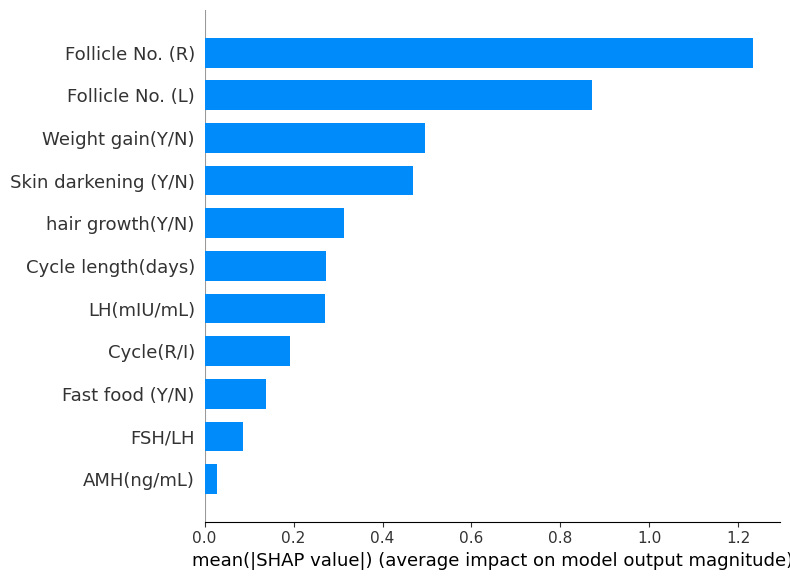

✓ Combined SHAP summary plot created

Top LIME Feature Contributions (Human-Friendly):
Rank Feature                   Value      Contribution Impact
----------------------------------------------------------------------
1    Follicle No. (R) > 0.50   N/A        +0.495258 Increases PCOS likelihood
2    Follicle No. (L) > 0.41   N/A        +0.194166 Increases PCOS likelihood
3    FSH/LH <= 0.00            N/A        -0.109549 Reduces PCOS likelihood
4    Cycle length(days) > 0.42 N/A        -0.056493 Reduces PCOS likelihood
5    LH(mIU/mL) > 0.00         N/A        +0.054752 Increases PCOS likelihood
6    AMH(ng/mL) > 0.75         N/A        -0.045299 Reduces PCOS likelihood
7    Cycle(R/I) > 0.67         N/A        +0.040733 Increases PCOS likelihood
8    Weight gain(Y/N) > 1.00   N/A        +0.039626 Increases PCOS likelihood
9    hair growth(Y/N) > 1.00   N/A        +0.039626 Increases PCOS likelihood
10   Skin darkening (Y/N) > 1.00 N/A        +0.039626 Increases PCOS likelihood


In [42]:
import pandas as pd
import numpy as np
import shap
from lime.lime_tabular import LimeTabularExplainer
from typing import List, Any
import re

# ------------------------------
# Example patient row
# ------------------------------
PATIENT_FULL_ROW: List[float] = [
    4, 4, 4, 0, 37, 65, 148, 29.7, 13, 72, 20, 12, 2, 5, 4, 0, 0, 1.99, 1.99,
    8.06, 2.36, 3.42, 42, 36, 0.86, 16.41, 1.22, 36.9, 33.4, 0.36, 76, 0, 0, 0, 0,
    0, 0, 0, 120, 70, 2, 2, 15, 14, 7.5
]

# ------------------------------
# Create patient dataframe
# ------------------------------
def create_patient_dataframe(patient_row: List[float], feature_columns: List[str]) -> pd.DataFrame:
    patient_features = patient_row[:len(feature_columns)]
    return pd.DataFrame([patient_features], columns=feature_columns)

# ------------------------------
# Predict patient PCOS
# ------------------------------
def predict_patient_pcos(pipeline: Any, X_patient: pd.DataFrame) -> tuple:
    y_pred = pipeline.predict(X_patient)
    y_prob = pipeline.predict_proba(X_patient)
    return y_pred[0], y_prob[0]

# ------------------------------
# SHAP force plot for trees
# ------------------------------
def shap_force_plot_fixed(explainer: Any, X: pd.DataFrame, class_index=1):
    shap_values = explainer(X)
    
    if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
        values_to_plot = shap_values.values[class_index]
        base_value = shap_values.base_values[class_index]
    elif hasattr(shap_values, 'values'):
        if shap_values.values.ndim > 2:
            values_to_plot = shap_values.values[0, :, class_index]
            base_value = shap_values.base_values[0, class_index] if shap_values.base_values.ndim > 1 else shap_values.base_values[class_index]
        else:
            values_to_plot = shap_values.values[0]
            base_value = shap_values.base_values[0] if hasattr(shap_values.base_values, '__len__') else shap_values.base_values
    else:
        raise ValueError("Unexpected SHAP values format")
    
    shap.plots.force(
        base_value=base_value,
        shap_values=values_to_plot,
        features=X.iloc[0].values,
        feature_names=X.columns.tolist()
    )
    return shap_values

# ------------------------------
# Create SHAP explanations
# ------------------------------
def create_shap_explanations(models: dict, X_patient: pd.DataFrame, X_train: pd.DataFrame) -> dict:
    explanations = {}
    # Tree-based models
    for model_name in ['rf', 'xgb']:
        if model_name in models:
            explainer = shap.TreeExplainer(models[model_name])
            explanations[model_name] = shap_force_plot_fixed(explainer, X_patient)
            print(f"✓ SHAP explanation created for {model_name.upper()}")
    # SVM
    if 'svm' in models:
        sample_data = shap.sample(X_train, min(100, len(X_train)))
        explainer_svm = shap.KernelExplainer(models['svm'].predict_proba, sample_data)
        explanations['svm'] = explainer_svm.shap_values(X_patient)
        print("✓ SHAP explanation created for SVM")
    return explanations

# ------------------------------
# Create SHAP summary plot
# ------------------------------
def create_summary_plot(shap_explanations: dict, X_patient: pd.DataFrame):
    valid_shap_values = []
    for model_name in ['rf', 'xgb']:
        if model_name in shap_explanations and shap_explanations[model_name] is not None:
            shap_vals = shap_explanations[model_name]
            if hasattr(shap_vals, 'values'):
                if isinstance(shap_vals.values, list):
                    values = shap_vals.values[1]
                else:
                    if shap_vals.values.ndim > 2:
                        values = shap_vals.values[0, :, 1]
                    else:
                        values = shap_vals.values[0]
                valid_shap_values.append(values)
    if 'svm' in shap_explanations:
        svm_vals = shap_explanations['svm']
        if isinstance(svm_vals, list) and len(svm_vals) > 1:
            valid_shap_values.append(svm_vals[1][0])
    if valid_shap_values:
        shap_values_combined = np.mean(valid_shap_values, axis=0)
        shap.summary_plot(
            shap_values_combined.reshape(1, -1),
            X_patient,
            feature_names=X_patient.columns.tolist(),
            plot_type="bar",
            show=True
        )
        print("✓ Combined SHAP summary plot created")

# ------------------------------
# LIME explanation
# ------------------------------
def lime_explanation_human(X_train, y_train, X_patient, pipeline, top_n=10):
    feature_names = X_train.columns.tolist()
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=['No PCOS', 'PCOS'],
        mode='classification',
        discretize_continuous=True
    )
    exp = explainer.explain_instance(
        data_row=X_patient.iloc[0].values,
        predict_fn=pipeline.predict_proba,
        num_features=len(feature_names),
        labels=(1,)
    )
    mapped_features = []
    for feat_desc, contrib in exp.as_list(label=1):
        match = re.match(r'feat_(\d+)', feat_desc)
        if match:
            idx = int(match.group(1))
            actual_name = feature_names[idx]
        else:
            actual_name = feat_desc
        patient_value = X_patient.iloc[0][actual_name] if actual_name in X_patient.columns else "N/A"
        impact = "Increases PCOS likelihood" if contrib > 0 else "Reduces PCOS likelihood"
        mapped_features.append({
            "Feature": actual_name,
            "Patient Value": patient_value,
            "Contribution": contrib,
            "Impact": impact
        })
    mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
    print("\nTop LIME Feature Contributions (Human-Friendly):")
    print("=" * 70)
    print(f"{'Rank':<4} {'Feature':<25} {'Value':<10} {'Contribution':<12} {'Impact'}")
    print("-" * 70)
    for i, feat in enumerate(mapped_features[:top_n], 1):
        print(f"{i:<4} {feat['Feature']:<25} {feat['Patient Value']:<10} "
              f"{feat['Contribution']:+.6f} {feat['Impact']}")
    print("=" * 70)
    return exp

# ------------------------------
# Main function
# ------------------------------
def main(pipeline, models, X_train, y_train):
    X_patient = create_patient_dataframe(PATIENT_FULL_ROW, X_train.columns.tolist())
    print(f"Patient data shape: {X_patient.shape}")
    # Prediction
    prediction, probabilities = predict_patient_pcos(pipeline, X_patient)
    print(f"\nPredicted PCOS (Y/N): {prediction}")
    print(f"Probability distribution: {probabilities}")
    print(f"Confidence: {max(probabilities):.3f}")
    # SHAP explanations
    shap_explanations = create_shap_explanations(models, X_patient, X_train)
    create_summary_plot(shap_explanations, X_patient)
    # LIME explanation
    lime_explanation_human(X_train, y_train, X_patient, pipeline)

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # Replace these with your actual trained models/pipeline
    # pipeline = your ensemble pipeline
    # best_rf = trained RandomForest
    # best_xgb = trained XGBoost
    # best_svm = trained SVM
    # X_train, y_train = your training data
    
    models = {
        'rf': best_rf,
        'xgb': best_xgb,
        'svm': best_svm
    }
    
    main(pipeline, models, X_train, y_train)


Patient data shape: (1, 11)

Predicted PCOS (Y/N): 1
Probability distribution: [3.72317700e-04 9.99627682e-01]
Confidence: 1.000
✓ SHAP explanation created for RF
✓ SHAP explanation created for XGB


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


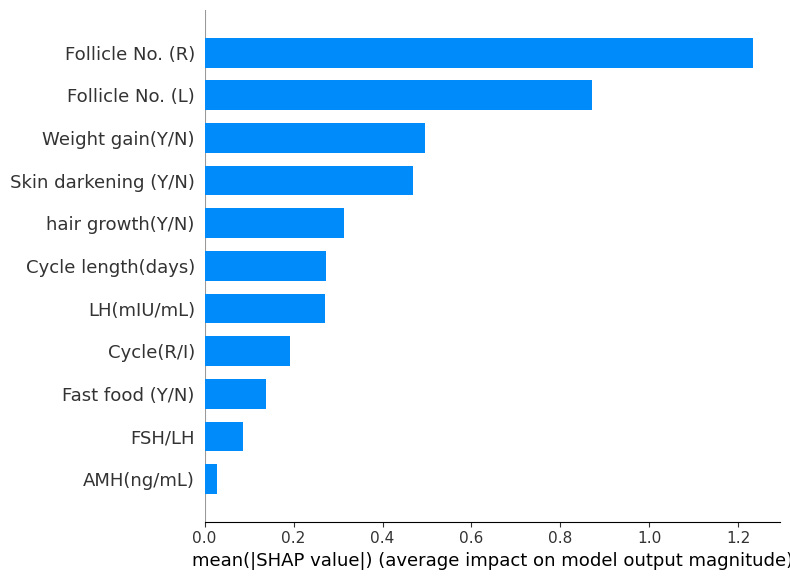

✓ Combined SHAP summary plot created

Top LIME Feature Contributions (Human-Friendly):
Rank Feature                             Value      Contribution Impact                    Condition
----------------------------------------------------------------------------------------------------
1    Follicle No. (R) > 0.50             N/A        +0.456566 Increases PCOS likelihood Follicle No. (R) > 0.50
2    Cycle(R/I) > 0.67                   N/A        +0.285813 Increases PCOS likelihood Cycle(R/I) > 0.67
3    Follicle No. (L) > 0.41             N/A        +0.204195 Increases PCOS likelihood Follicle No. (L) > 0.41
4    FSH/LH <= 0.00                      N/A        -0.130176 Reduces PCOS likelihood   FSH/LH <= 0.00
5    Cycle length(days) > 0.42           N/A        -0.072040 Reduces PCOS likelihood   Cycle length(days) > 0.42
6    LH(mIU/mL) > 0.00                   N/A        +0.070009 Increases PCOS likelihood LH(mIU/mL) > 0.00
7    AMH(ng/mL) > 0.75                   N/A        -0.020

In [43]:
import pandas as pd
import numpy as np
import shap
from lime.lime_tabular import LimeTabularExplainer
from typing import List, Any
import re

# ------------------------------
# Example patient row
# ------------------------------
PATIENT_FULL_ROW: List[float] = [
    4, 4, 4, 0, 37, 65, 148, 29.7, 13, 72, 20, 12, 2, 5, 4, 0, 0, 1.99, 1.99,
    8.06, 2.36, 3.42, 42, 36, 0.86, 16.41, 1.22, 36.9, 33.4, 0.36, 76, 0, 0, 0, 0,
    0, 0, 0, 120, 70, 2, 2, 15, 14, 7.5
]

# ------------------------------
# Create patient dataframe
# ------------------------------
def create_patient_dataframe(patient_row: List[float], feature_columns: List[str]) -> pd.DataFrame:
    patient_features = patient_row[:len(feature_columns)]
    return pd.DataFrame([patient_features], columns=feature_columns)

# ------------------------------
# Predict patient PCOS
# ------------------------------
def predict_patient_pcos(pipeline: Any, X_patient: pd.DataFrame) -> tuple:
    y_pred = pipeline.predict(X_patient)
    y_prob = pipeline.predict_proba(X_patient)
    return y_pred[0], y_prob[0]

# ------------------------------
# SHAP force plot for trees
# ------------------------------
def shap_force_plot_fixed(explainer: Any, X: pd.DataFrame, class_index=1):
    shap_values = explainer(X)
    
    if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
        values_to_plot = shap_values.values[class_index]
        base_value = shap_values.base_values[class_index]
    elif hasattr(shap_values, 'values'):
        if shap_values.values.ndim > 2:
            values_to_plot = shap_values.values[0, :, class_index]
            base_value = shap_values.base_values[0, class_index] if shap_values.base_values.ndim > 1 else shap_values.base_values[class_index]
        else:
            values_to_plot = shap_values.values[0]
            base_value = shap_values.base_values[0] if hasattr(shap_values.base_values, '__len__') else shap_values.base_values
    else:
        raise ValueError("Unexpected SHAP values format")
    
    shap.plots.force(
        base_value=base_value,
        shap_values=values_to_plot,
        features=X.iloc[0].values,
        feature_names=X.columns.tolist()
    )
    return shap_values

# ------------------------------
# Create SHAP explanations
# ------------------------------
def create_shap_explanations(models: dict, X_patient: pd.DataFrame, X_train: pd.DataFrame) -> dict:
    explanations = {}
    # Tree-based models
    for model_name in ['rf', 'xgb']:
        if model_name in models:
            explainer = shap.TreeExplainer(models[model_name])
            explanations[model_name] = shap_force_plot_fixed(explainer, X_patient)
            print(f"✓ SHAP explanation created for {model_name.upper()}")
    # SVM
    if 'svm' in models:
        sample_data = shap.sample(X_train, min(100, len(X_train)))
        explainer_svm = shap.KernelExplainer(models['svm'].predict_proba, sample_data)
        explanations['svm'] = explainer_svm.shap_values(X_patient)
        print("✓ SHAP explanation created for SVM")
    return explanations

# ------------------------------
# Create SHAP summary plot
# ------------------------------
def create_summary_plot(shap_explanations: dict, X_patient: pd.DataFrame):
    valid_shap_values = []
    for model_name in ['rf', 'xgb']:
        if model_name in shap_explanations and shap_explanations[model_name] is not None:
            shap_vals = shap_explanations[model_name]
            if hasattr(shap_vals, 'values'):
                if isinstance(shap_vals.values, list):
                    values = shap_vals.values[1]
                else:
                    if shap_vals.values.ndim > 2:
                        values = shap_vals.values[0, :, 1]
                    else:
                        values = shap_vals.values[0]
                valid_shap_values.append(values)
    if 'svm' in shap_explanations:
        svm_vals = shap_explanations['svm']
        if isinstance(svm_vals, list) and len(svm_vals) > 1:
            valid_shap_values.append(svm_vals[1][0])
    if valid_shap_values:
        shap_values_combined = np.mean(valid_shap_values, axis=0)
        shap.summary_plot(
            shap_values_combined.reshape(1, -1),
            X_patient,
            feature_names=X_patient.columns.tolist(),
            plot_type="bar",
            show=True
        )
        print("✓ Combined SHAP summary plot created")

# ------------------------------
# LIME explanation with real column mapping
# ------------------------------
def lime_explanation_human(X_train, y_train, X_patient, pipeline, top_n=10):
    feature_names = X_train.columns.tolist()
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=['No PCOS', 'PCOS'],
        mode='classification',
        discretize_continuous=True
    )
    exp = explainer.explain_instance(
        data_row=X_patient.iloc[0].values,
        predict_fn=pipeline.predict_proba,
        num_features=len(feature_names),
        labels=(1,)
    )
    mapped_features = []
    for feat_desc, contrib in exp.as_list(label=1):
        # Capture feat_index and any condition (like > 1.93)
        match = re.match(r'feat_(\d+)(.*)', feat_desc)
        if match:
            idx = int(match.group(1))
            condition = match.group(2).strip()
            actual_name = feature_names[idx]
            feat_desc_fixed = f"{actual_name} {condition}".strip()
        else:
            actual_name = feat_desc
            feat_desc_fixed = feat_desc
        patient_value = X_patient.iloc[0][actual_name] if actual_name in X_patient.columns else "N/A"
        impact = "Increases PCOS likelihood" if contrib > 0 else "Reduces PCOS likelihood"
        mapped_features.append({
            "Feature": actual_name,
            "Patient Value": patient_value,
            "Contribution": contrib,
            "Impact": impact,
            "Condition": feat_desc_fixed
        })
    mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
    
    print("\nTop LIME Feature Contributions (Human-Friendly):")
    print("=" * 100)
    print(f"{'Rank':<4} {'Feature':<35} {'Value':<10} {'Contribution':<12} {'Impact':<25} {'Condition'}")
    print("-" * 100)
    for i, feat in enumerate(mapped_features[:top_n], 1):
        print(f"{i:<4} {feat['Feature']:<35} {feat['Patient Value']:<10} "
              f"{feat['Contribution']:+.6f} {feat['Impact']:<25} {feat['Condition']}")
    print("=" * 100)
    return exp

# ------------------------------
# Main function
# ------------------------------
def main(pipeline, models, X_train, y_train):
    X_patient = create_patient_dataframe(PATIENT_FULL_ROW, X_train.columns.tolist())
    print(f"Patient data shape: {X_patient.shape}")
    # Prediction
    prediction, probabilities = predict_patient_pcos(pipeline, X_patient)
    print(f"\nPredicted PCOS (Y/N): {prediction}")
    print(f"Probability distribution: {probabilities}")
    print(f"Confidence: {max(probabilities):.3f}")
    # SHAP explanations
    shap_explanations = create_shap_explanations(models, X_patient, X_train)
    create_summary_plot(shap_explanations, X_patient)
    # LIME explanation
    lime_explanation_human(X_train, y_train, X_patient, pipeline)

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # Replace these with your actual trained models/pipeline
    # pipeline = your ensemble pipeline
    # best_rf = trained RandomForest
    # best_xgb = trained XGBoost
    # best_svm = trained SVM
    # X_train, y_train = your training data
    
    models = {
        'rf': best_rf,
        'xgb': best_xgb,
        'svm': best_svm
    }
    
    main(pipeline, models, X_train, y_train)


Patient data shape: (1, 11)

Predicted PCOS (Y/N): 1
Probability distribution: [0.00140326 0.99859674]
Confidence: 0.999
✓ SHAP explanation created for RF
✓ SHAP explanation created for XGB


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


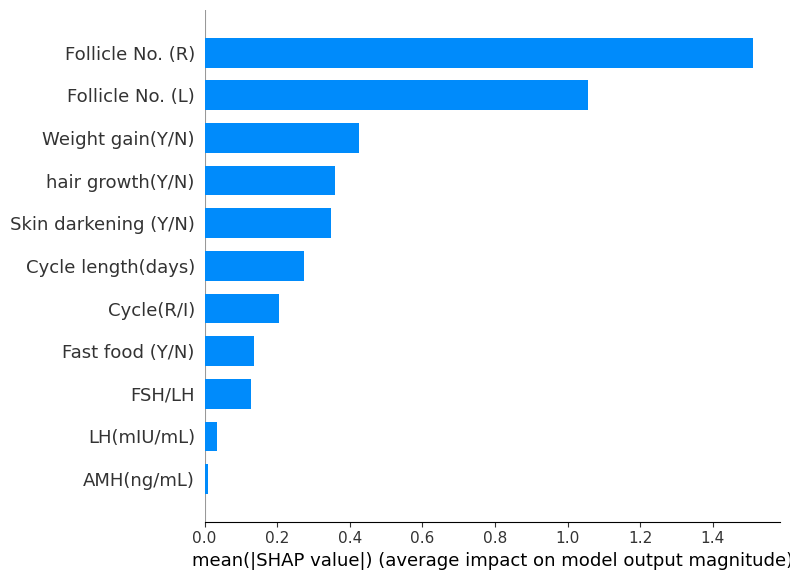

✓ Combined SHAP summary plot created

Top LIME Feature Contributions (Human-Friendly):
Rank Feature                             Value      Contribution Impact                    Condition
----------------------------------------------------------------------------------------------------
1    Follicle No. (R) > 0.50             N/A        +0.468954 Increases PCOS likelihood Follicle No. (R) > 0.50
2    FSH/LH > 0.00                       N/A        +0.324195 Increases PCOS likelihood FSH/LH > 0.00
3    Cycle(R/I) > 0.67                   N/A        +0.293781 Increases PCOS likelihood Cycle(R/I) > 0.67
4    Follicle No. (L) > 0.41             N/A        +0.190778 Increases PCOS likelihood Follicle No. (L) > 0.41
5    hair growth(Y/N) > 1.00             N/A        -0.074499 Reduces PCOS likelihood   hair growth(Y/N) > 1.00
6    Skin darkening (Y/N) > 1.00         N/A        -0.074499 Reduces PCOS likelihood   Skin darkening (Y/N) > 1.00
7    Weight gain(Y/N) > 1.00             N/A       

In [44]:
import pandas as pd
import numpy as np
import shap
from lime.lime_tabular import LimeTabularExplainer
from typing import List, Any
import re

# ------------------------------
# Dataset feature columns
# ------------------------------
feature_columns = [
    "Sl. No", "Patient File No.", "PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI",
    "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)",
    "Marraige Status (Yrs)", "Pregnant(Y/N)", "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)",
    "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)",
    "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)",
    "Reg.Exercise(Y/N)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)",
    "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"
]

# ------------------------------
# Example patient row (new data)
# ------------------------------
PATIENT_FULL_ROW: List[float] = [
    3,3,3,1,33,68.8,165,25.3,11,72,18,11.8,2,5,10,1,0,494.08,494.08,5.54,0.88,6.3,
    40,36,0.9,2.54,6.63,10.52,49.7,0.36,84,0,0,0,1,1,1,0,120,80,13,15,18,20,10
]

# ------------------------------
# Create patient dataframe
# ------------------------------
def create_patient_dataframe(patient_row: List[float], feature_columns: List[str]) -> pd.DataFrame:
    patient_features = patient_row[:len(feature_columns)]
    return pd.DataFrame([patient_features], columns=feature_columns)

# ------------------------------
# Predict patient PCOS
# ------------------------------
def predict_patient_pcos(pipeline: Any, X_patient: pd.DataFrame) -> tuple:
    y_pred = pipeline.predict(X_patient)
    y_prob = pipeline.predict_proba(X_patient)
    return y_pred[0], y_prob[0]

# ------------------------------
# SHAP force plot for trees
# ------------------------------
def shap_force_plot_fixed(explainer: Any, X: pd.DataFrame, class_index=1):
    shap_values = explainer(X)
    
    if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
        values_to_plot = shap_values.values[class_index]
        base_value = shap_values.base_values[class_index]
    elif hasattr(shap_values, 'values'):
        if shap_values.values.ndim > 2:
            values_to_plot = shap_values.values[0, :, class_index]
            base_value = shap_values.base_values[0, class_index] if shap_values.base_values.ndim > 1 else shap_values.base_values[class_index]
        else:
            values_to_plot = shap_values.values[0]
            base_value = shap_values.base_values[0] if hasattr(shap_values.base_values, '__len__') else shap_values.base_values
    else:
        raise ValueError("Unexpected SHAP values format")
    
    shap.plots.force(
        base_value=base_value,
        shap_values=values_to_plot,
        features=X.iloc[0].values,
        feature_names=X.columns.tolist()
    )
    return shap_values

# ------------------------------
# Create SHAP explanations
# ------------------------------
def create_shap_explanations(models: dict, X_patient: pd.DataFrame, X_train: pd.DataFrame) -> dict:
    explanations = {}
    # Tree-based models
    for model_name in ['rf', 'xgb']:
        if model_name in models:
            explainer = shap.TreeExplainer(models[model_name])
            explanations[model_name] = shap_force_plot_fixed(explainer, X_patient)
            print(f"✓ SHAP explanation created for {model_name.upper()}")
    # SVM
    if 'svm' in models:
        sample_data = shap.sample(X_train, min(100, len(X_train)))
        explainer_svm = shap.KernelExplainer(models['svm'].predict_proba, sample_data)
        explanations['svm'] = explainer_svm.shap_values(X_patient)
        print("✓ SHAP explanation created for SVM")
    return explanations

# ------------------------------
# Create SHAP summary plot
# ------------------------------
def create_summary_plot(shap_explanations: dict, X_patient: pd.DataFrame):
    valid_shap_values = []
    for model_name in ['rf', 'xgb']:
        if model_name in shap_explanations and shap_explanations[model_name] is not None:
            shap_vals = shap_explanations[model_name]
            if hasattr(shap_vals, 'values'):
                if isinstance(shap_vals.values, list):
                    values = shap_vals.values[1]
                else:
                    if shap_vals.values.ndim > 2:
                        values = shap_vals.values[0, :, 1]
                    else:
                        values = shap_vals.values[0]
                valid_shap_values.append(values)
    if 'svm' in shap_explanations:
        svm_vals = shap_explanations['svm']
        if isinstance(svm_vals, list) and len(svm_vals) > 1:
            valid_shap_values.append(svm_vals[1][0])
    if valid_shap_values:
        shap_values_combined = np.mean(valid_shap_values, axis=0)
        shap.summary_plot(
            shap_values_combined.reshape(1, -1),
            X_patient,
            feature_names=X_patient.columns.tolist(),
            plot_type="bar",
            show=True
        )
        print("✓ Combined SHAP summary plot created")

# ------------------------------
# LIME explanation with real column mapping
# ------------------------------
def lime_explanation_human(X_train, y_train, X_patient, pipeline, top_n=10):
    feature_names = X_train.columns.tolist()
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=['No PCOS', 'PCOS'],
        mode='classification',
        discretize_continuous=True
    )
    exp = explainer.explain_instance(
        data_row=X_patient.iloc[0].values,
        predict_fn=pipeline.predict_proba,
        num_features=len(feature_names),
        labels=(1,)
    )
    mapped_features = []
    for feat_desc, contrib in exp.as_list(label=1):
        # Capture feat_index and any condition (like > 1.93)
        match = re.match(r'feat_(\d+)(.*)', feat_desc)
        if match:
            idx = int(match.group(1))
            condition = match.group(2).strip()
            actual_name = feature_names[idx]
            feat_desc_fixed = f"{actual_name} {condition}".strip()
        else:
            actual_name = feat_desc
            feat_desc_fixed = feat_desc
        patient_value = X_patient.iloc[0][actual_name] if actual_name in X_patient.columns else "N/A"
        impact = "Increases PCOS likelihood" if contrib > 0 else "Reduces PCOS likelihood"
        mapped_features.append({
            "Feature": actual_name,
            "Patient Value": patient_value,
            "Contribution": contrib,
            "Impact": impact,
            "Condition": feat_desc_fixed
        })
    mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
    
    print("\nTop LIME Feature Contributions (Human-Friendly):")
    print("=" * 100)
    print(f"{'Rank':<4} {'Feature':<35} {'Value':<10} {'Contribution':<12} {'Impact':<25} {'Condition'}")
    print("-" * 100)
    for i, feat in enumerate(mapped_features[:top_n], 1):
        print(f"{i:<4} {feat['Feature']:<35} {feat['Patient Value']:<10} "
              f"{feat['Contribution']:+.6f} {feat['Impact']:<25} {feat['Condition']}")
    print("=" * 100)
    return exp

# ------------------------------
# Main function
# ------------------------------
def main(pipeline, models, X_train, y_train):
    X_patient = create_patient_dataframe(PATIENT_FULL_ROW, X_train.columns.tolist())
    print(f"Patient data shape: {X_patient.shape}")
    # Prediction
    prediction, probabilities = predict_patient_pcos(pipeline, X_patient)
    print(f"\nPredicted PCOS (Y/N): {prediction}")
    print(f"Probability distribution: {probabilities}")
    print(f"Confidence: {max(probabilities):.3f}")
    # SHAP explanations
    shap_explanations = create_shap_explanations(models, X_patient, X_train)
    create_summary_plot(shap_explanations, X_patient)
    # LIME explanation
    lime_explanation_human(X_train, y_train, X_patient, pipeline)

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # Replace these with your actual trained models/pipeline
    # pipeline = your ensemble pipeline
    # best_rf = trained RandomForest
    # best_xgb = trained XGBoost
    # best_svm = trained SVM
    # X_train, y_train = your training data
    
    models = {
        'rf': best_rf,
        'xgb': best_xgb,
        'svm': best_svm
    }
    
    main(pipeline, models, X_train, y_train)


PCOS Prediction and Explainability System

Step 1: Load and preprocess data
------------------------------


Enter path to PCOS dataset CSV file (or press Enter for demo):  PCOS_data.csv


✓ Data loaded successfully: (541, 44)
✓ Data preprocessed: (541, 41), Target distribution: {0: 364, 1: 177}
✓ Data split: Train (432, 41), Test (109, 41)

Step 2: Train machine learning models
------------------------------
Training RF...
✓ RF trained - CV Score: 0.9532
Training XGB...
✓ XGB trained - CV Score: 0.9417
Training SVM...
✓ SVM trained - CV Score: 0.9446
Training LR...
✓ LR trained - CV Score: 0.9492

Step 3: Evaluate models
------------------------------

MODEL EVALUATION RESULTS
RF         | Accuracy: 0.9083 | ROC-AUC: 0.9448
XGB        | Accuracy: 0.9266 | ROC-AUC: 0.9502
SVM        | Accuracy: 0.9174 | ROC-AUC: 0.9540
LR         | Accuracy: 0.9174 | ROC-AUC: 0.9612

Step 4: Create ensemble pipeline
------------------------------
✓ Best model selected: RF (Score: 0.9532)

Step 5: Analyze sample patient
------------------------------
Patient data shape: (1, 41)
Features: 41

PCOS PREDICTION RESULTS
Predicted PCOS: NO
PCOS Probability: 45.3%
No PCOS Probability: 54.7%
Conf

  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for LR


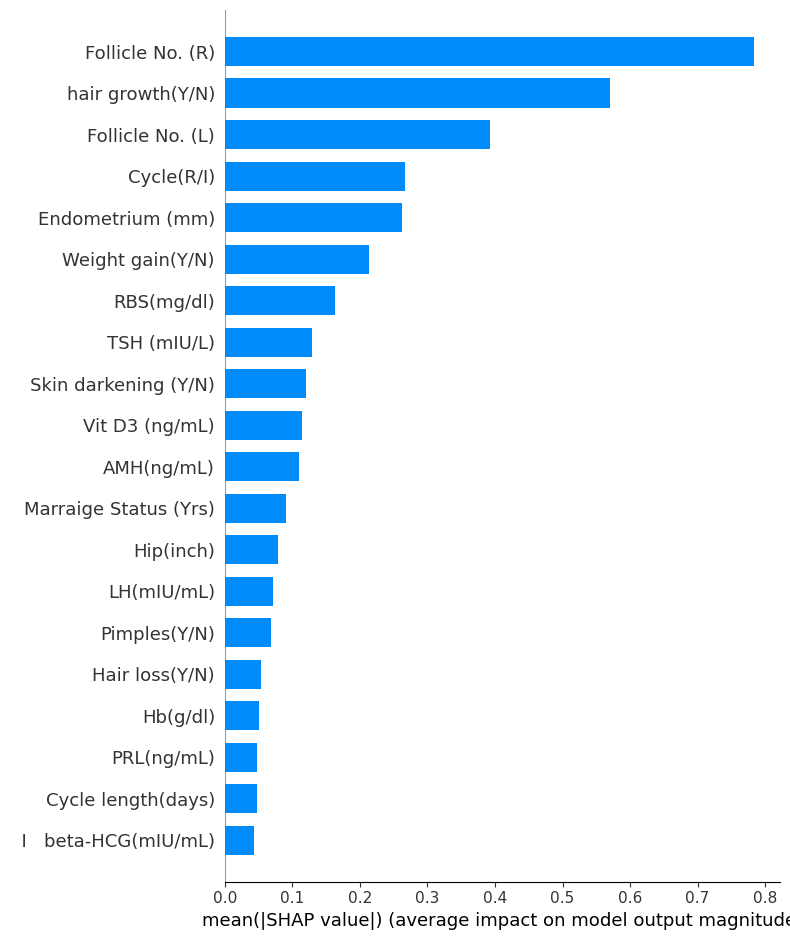

✓ Combined SHAP summary plot created

Generating LIME explanation...

Top LIME Feature Contributions (Human-Friendly):
Rank Feature                   Value        Contribution    Impact                    Condition                          
------------------------------------------------------------------------------------------------------------------------
1    Follicle No. (R) <= 3.00  N/A          -0.118919       Reduces PCOS likelihood   Follicle No. (R) <= 3.00           
2    Follicle No. (L) <= 3.00  N/A          -0.088039       Reduces PCOS likelihood   Follicle No. (L) <= 3.00           
3    0.00 < Skin darkening (Y  N/A          +0.078726       Increases PCOS likelihood 0.00 < Skin darkening (Y/N) <= 1.0 
4    Cycle(R/I) > 4.00         N/A          +0.061058       Increases PCOS likelihood Cycle(R/I) > 4.00                  
5    Fast food (Y/N) <= 0.00   N/A          -0.024707       Reduces PCOS likelihood   Fast food (Y/N) <= 0.00            
6    Cycle length(days) > 5.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from typing import List, Any, Dict, Tuple, Optional
import warnings
import re

warnings.filterwarnings('ignore')

# Constants
FEATURE_COLUMNS: List[str] = [
    "Sl. No", "Patient File No.", "PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI",
    "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)",
    "Marraige Status (Yrs)", "Pregnant(Y/N)", "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)",
    "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)",
    "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)",
    "Reg.Exercise(Y/N)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)",
    "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"
]

PATIENT_FULL_ROW: List[float] = [
    3, 3, 3, 1, 33, 68.8, 165, 25.3, 11, 72, 18, 11.8, 2, 5, 10, 1, 0, 494.08, 494.08, 5.54, 0.88, 6.3,
    40, 36, 0.9, 2.54, 6.63, 10.52, 49.7, 0.36, 84, 0, 0, 0, 1, 1, 1, 0, 120, 80, 13, 15, 18, 20, 10
]

RANDOM_STATE: int = 42


class PCOSPredictor:
    """Complete PCOS prediction and explainability system."""
    
    def __init__(self, random_state: int = RANDOM_STATE):
        """Initialize the PCOS predictor."""
        self.random_state = random_state
        self.models = {}
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        
    def load_data(self, filepath: str) -> pd.DataFrame:
        """Load PCOS dataset from CSV file."""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully: {data.shape}")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise
    
    def preprocess_data(self, data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Preprocess the PCOS dataset.
        
        Time Complexity: O(n*m) where n=samples, m=features
        Space Complexity: O(n*m)
        """
        # Remove unnecessary columns
        columns_to_drop = ["Sl. No", "Patient File No."]
        data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
        
        # Handle target variable
        target_column = "PCOS (Y/N)"
        if target_column in data_clean.columns:
            y = data_clean[target_column]
            X = data_clean.drop(columns=[target_column])
        else:
            raise ValueError(f"Target column '{target_column}' not found")
        
        # Handle missing values
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        
        # Fill missing values
        if len(numeric_columns) > 0:
            X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
        if len(categorical_columns) > 0:
            X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])
        
        # Encode categorical variables
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
        
        self.label_encoders = label_encoders
        self.feature_names = X.columns.tolist()
        
        print(f"✓ Data preprocessed: {X.shape}, Target distribution: {y.value_counts().to_dict()}")
        return X, y
    
    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2) -> None:
        """Split data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )
        print(f"✓ Data split: Train {self.X_train.shape}, Test {self.X_test.shape}")
    
    def train_models(self) -> Dict[str, Any]:
        """
        Train multiple ML models with hyperparameter tuning.
        
        Time Complexity: O(k*n*log(n)) for tree-based models where k=iterations, n=samples
        Space Complexity: O(n*m) where m=features
        """
        models_config = {
            'rf': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, None],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]
                }
            },
            'xgb': {
                'model': XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 6, 10],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 1.0]
                }
            },
            'svm': {
                'model': SVC(probability=True, random_state=self.random_state),
                'params': {
                    'C': [0.1, 1, 10],
                    'gamma': ['scale', 'auto'],
                    'kernel': ['rbf', 'linear']
                }
            },
            'lr': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs']
                }
            }
        }
        
        trained_models = {}
        model_scores = {}
        
        for model_name, config in models_config.items():
            print(f"Training {model_name.upper()}...")
            try:
                # Create pipeline with scaling for SVM and Logistic Regression
                if model_name in ['svm', 'lr']:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                else:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                
                # Grid search with cross-validation
                grid_search = GridSearchCV(
                    pipeline, param_grid, cv=5, scoring='roc_auc',
                    n_jobs=-1, verbose=0
                )
                grid_search.fit(self.X_train, self.y_train)
                
                trained_models[model_name] = grid_search.best_estimator_
                model_scores[model_name] = grid_search.best_score_
                
                print(f"✓ {model_name.upper()} trained - CV Score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                print(f"✗ Error training {model_name}: {e}")
        
        self.models = trained_models
        self.model_scores = model_scores
        return trained_models
    
    def evaluate_models(self) -> None:
        """Evaluate all trained models on test set."""
        print(f"\n{'='*60}")
        print("MODEL EVALUATION RESULTS")
        print(f"{'='*60}")
        
        results = {}
        for model_name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]
                
                accuracy = accuracy_score(self.y_test, y_pred)
                roc_auc = roc_auc_score(self.y_test, y_prob)
                
                results[model_name] = {
                    'accuracy': accuracy,
                    'roc_auc': roc_auc
                }
                
                print(f"{model_name.upper():<10} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
                
            except Exception as e:
                print(f"✗ Error evaluating {model_name}: {e}")
        
        print(f"{'='*60}")
        self.evaluation_results = results
    
    def create_ensemble_pipeline(self) -> Pipeline:
        """Create ensemble pipeline using the best performing model."""
        if not self.models:
            raise ValueError("No trained models available. Train models first.")
        
        # Select best model based on ROC-AUC score
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        best_model = self.models[best_model_name]
        
        print(f"✓ Best model selected: {best_model_name.upper()} (Score: {self.model_scores[best_model_name]:.4f})")
        
        self.pipeline = best_model
        return self.pipeline
    
    def create_patient_dataframe(self, patient_row: List[float]) -> pd.DataFrame:
        """Create patient dataframe from row data."""
        if self.feature_names is None:
            raise ValueError("Feature names not available. Preprocess data first.")
        
        # Use only the features used in training (excluding target and dropped columns)
        patient_features = patient_row[:len(self.feature_names)]
        return pd.DataFrame([patient_features], columns=self.feature_names)
    
    def predict_patient_pcos(self, X_patient: pd.DataFrame) -> Tuple[int, np.ndarray]:
        """Predict PCOS for patient data."""
        if self.pipeline is None:
            raise ValueError("Pipeline not created. Create ensemble pipeline first.")
        
        y_pred = self.pipeline.predict(X_patient)
        y_prob = self.pipeline.predict_proba(X_patient)
        return y_pred[0], y_prob[0]
    
    def shap_force_plot_fixed(self, explainer: Any, X: pd.DataFrame, class_index: int = 1) -> Any:
        """Generate SHAP force plot for tree-based models."""
        shap_values = explainer(X)
        
        if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
            values_to_plot = shap_values.values[class_index]
            base_value = shap_values.base_values[class_index]
        elif hasattr(shap_values, 'values'):
            if shap_values.values.ndim > 2:
                values_to_plot = shap_values.values[0, :, class_index]
                base_value = (shap_values.base_values[0, class_index] 
                             if shap_values.base_values.ndim > 1 
                             else shap_values.base_values[class_index])
            else:
                values_to_plot = shap_values.values[0]
                base_value = (shap_values.base_values[0] 
                             if hasattr(shap_values.base_values, '__len__') 
                             else shap_values.base_values)
        else:
            raise ValueError("Unexpected SHAP values format")
        
        shap.plots.force(
            base_value=base_value,
            shap_values=values_to_plot,
            features=X.iloc[0].values,
            feature_names=X.columns.tolist()
        )
        return shap_values
    
    def create_shap_explanations(self, X_patient: pd.DataFrame) -> Dict[str, Any]:
        """Create SHAP explanations for all models."""
        explanations = {}
        
        # Extract base models from pipelines for SHAP
        base_models = {}
        for model_name, pipeline in self.models.items():
            if hasattr(pipeline, 'named_steps') and 'model' in pipeline.named_steps:
                base_models[model_name] = pipeline.named_steps['model']
            else:
                base_models[model_name] = pipeline
        
        # Tree-based models (Random Forest, XGBoost)
        for model_name in ['rf', 'xgb']:
            if model_name in base_models:
                try:
                    explainer = shap.TreeExplainer(base_models[model_name])
                    # Transform data through pipeline preprocessing steps
                    X_transformed = X_patient.copy()
                    if hasattr(self.models[model_name], 'named_steps'):
                        for step_name, step in self.models[model_name].named_steps.items():
                            if step_name != 'model':
                                X_transformed = pd.DataFrame(
                                    step.transform(X_transformed), 
                                    columns=X_transformed.columns
                                )
                    
                    explanations[model_name] = self.shap_force_plot_fixed(explainer, X_transformed)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        # SVM and Logistic Regression models
        for model_name in ['svm', 'lr']:
            if model_name in base_models:
                try:
                    sample_size = min(100, len(self.X_train))
                    sample_data = shap.sample(self.X_train, sample_size)
                    
                    # Create prediction function that uses the full pipeline
                    def predict_fn(x):
                        return self.models[model_name].predict_proba(pd.DataFrame(x, columns=self.feature_names))
                    
                    explainer = shap.KernelExplainer(predict_fn, sample_data.values)
                    explanations[model_name] = explainer.shap_values(X_patient.values)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        return explanations
    
    def create_summary_plot(self, shap_explanations: Dict[str, Any], X_patient: pd.DataFrame) -> None:
        """Create combined SHAP summary plot."""
        valid_shap_values = []
        
        # Process tree-based models
        for model_name in ['rf', 'xgb']:
            if model_name in shap_explanations and shap_explanations[model_name] is not None:
                shap_vals = shap_explanations[model_name]
                if hasattr(shap_vals, 'values'):
                    if isinstance(shap_vals.values, list):
                        values = shap_vals.values[1]  # Class 1 (PCOS)
                    else:
                        values = (shap_vals.values[0, :, 1] 
                                 if shap_vals.values.ndim > 2 
                                 else shap_vals.values[0])
                    valid_shap_values.append(values)
        
        # Process SVM and Logistic Regression
        for model_name in ['svm', 'lr']:
            if model_name in shap_explanations:
                svm_vals = shap_explanations[model_name]
                if isinstance(svm_vals, list) and len(svm_vals) > 1:
                    valid_shap_values.append(svm_vals[1][0])  # Class 1 (PCOS)
        
        if valid_shap_values:
            try:
                shap_values_combined = np.mean(valid_shap_values, axis=0)
                shap.summary_plot(
                    shap_values_combined.reshape(1, -1),
                    X_patient,
                    feature_names=X_patient.columns.tolist(),
                    plot_type="bar",
                    show=True
                )
                print("✓ Combined SHAP summary plot created")
            except Exception as e:
                print(f"✗ Error creating summary plot: {e}")
        else:
            print("✗ No valid SHAP values found for summary plot")
    
    def lime_explanation_human(self, X_patient: pd.DataFrame, top_n: int = 15) -> Any:
        """
        Create LIME explanation with proper patient values display.
        
        Time Complexity: O(n*m) where n=num_features, m=num_samples for explanation
        Space Complexity: O(n*k) where k=num_perturbations
        """
        feature_names = self.X_train.columns.tolist()
        
        # Initialize LIME explainer
        explainer = LimeTabularExplainer(
            training_data=self.X_train.values,
            feature_names=feature_names,
            class_names=['No PCOS', 'PCOS'],
            mode='classification',
            discretize_continuous=True
        )
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=X_patient.iloc[0].values,
            predict_fn=self.pipeline.predict_proba,
            num_features=len(feature_names),
            labels=(1,)
        )
        
        # Process and map features with actual patient values
        mapped_features = []
        patient_values = X_patient.iloc[0]
        
        for feat_desc, contrib in exp.as_list(label=1):
            # Extract feature index from LIME description (e.g., "feat_5 > 1.93")
            match = re.match(r'feat_(\d+)(.*)', feat_desc)
            if match:
                feat_idx = int(match.group(1))
                condition = match.group(2).strip()
                actual_name = feature_names[feat_idx]
                feat_desc_fixed = f"{actual_name}{condition}".strip()
            else:
                # Handle case where feature name is already proper
                actual_name = feat_desc
                feat_desc_fixed = feat_desc
                feat_idx = feature_names.index(actual_name) if actual_name in feature_names else -1
            
            # Get actual patient value
            if feat_idx >= 0 and feat_idx < len(patient_values):
                patient_value = patient_values.iloc[feat_idx]
            elif actual_name in patient_values.index:
                patient_value = patient_values[actual_name]
            else:
                patient_value = "N/A"
            
            # Determine impact direction
            impact = "Increases PCOS likelihood" if contrib > 0 else "Reduces PCOS likelihood"
            
            mapped_features.append({
                "Feature": actual_name,
                "Patient Value": patient_value,
                "Contribution": contrib,
                "Impact": impact,
                "Condition": feat_desc_fixed
            })
        
        # Sort by absolute contribution (most important first)
        mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
        
        # Display results
        print("\nTop LIME Feature Contributions (Human-Friendly):")
        print("=" * 120)
        print(f"{'Rank':<4} {'Feature':<25} {'Value':<12} {'Contribution':<15} {'Impact':<25} {'Condition':<35}")
        print("-" * 120)
        
        for i, feat in enumerate(mapped_features[:top_n], 1):
            value_str = f"{feat['Patient Value']:.3f}" if isinstance(feat['Patient Value'], (int, float)) else str(feat['Patient Value'])
            contrib_str = f"{feat['Contribution']:+.6f}"
            
            print(f"{i:<4} {feat['Feature'][:24]:<25} {value_str:<12} {contrib_str:<15} "
                  f"{feat['Impact']:<25} {feat['Condition'][:34]:<35}")
        
        print("=" * 120)
        
        # Summary statistics
        total_positive = sum(f['Contribution'] for f in mapped_features if f['Contribution'] > 0)
        total_negative = sum(f['Contribution'] for f in mapped_features if f['Contribution'] < 0)
        
        print(f"\nSummary:")
        print(f"Total positive contribution (toward PCOS): {total_positive:+.6f}")
        print(f"Total negative contribution (away from PCOS): {total_negative:+.6f}")
        print(f"Net contribution: {total_positive + total_negative:+.6f}")
        
        return exp
    
    def analyze_patient(self, patient_row: List[float] = None) -> None:
        """
        Complete patient analysis with predictions and explanations.
        
        Args:
            patient_row: List of patient feature values. If None, uses default PATIENT_FULL_ROW
        """
        if patient_row is None:
            patient_row = PATIENT_FULL_ROW
        
        try:
            # Create patient dataframe
            X_patient = self.create_patient_dataframe(patient_row)
            print(f"Patient data shape: {X_patient.shape}")
            print(f"Features: {len(X_patient.columns)}")
            
            # Make prediction
            prediction, probabilities = self.predict_patient_pcos(X_patient)
            pcos_probability = probabilities[1] if len(probabilities) > 1 else probabilities[0]
            
            print(f"\n{'='*50}")
            print(f"PCOS PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Predicted PCOS: {'YES' if prediction == 1 else 'NO'}")
            print(f"PCOS Probability: {pcos_probability:.1%}")
            print(f"No PCOS Probability: {probabilities[0]:.1%}")
            print(f"Confidence: {max(probabilities):.1%}")
            print(f"{'='*50}")
            
            # Generate SHAP explanations
            print(f"\nGenerating SHAP explanations...")
            shap_explanations = self.create_shap_explanations(X_patient)
            
            if shap_explanations:
                self.create_summary_plot(shap_explanations, X_patient)
            
            # Generate LIME explanation
            print(f"\nGenerating LIME explanation...")
            self.lime_explanation_human(X_patient, top_n=15)
            
        except Exception as e:
            print(f"Error in patient analysis: {e}")
            raise


def main():
    """
    Main function to demonstrate the complete PCOS prediction and explainability system.
    
    Usage:
        1. Load your PCOS dataset CSV file
        2. The system will automatically preprocess, train models, and analyze a sample patient
        3. Customize the patient data by modifying PATIENT_FULL_ROW
    """
    # Initialize predictor
    predictor = PCOSPredictor(random_state=RANDOM_STATE)
    
    print("PCOS Prediction and Explainability System")
    print("=" * 50)
    
    try:
        # Load and preprocess data
        print("\nStep 1: Load and preprocess data")
        print("-" * 30)
        
        # Replace 'your_pcos_dataset.csv' with your actual file path
        data_file = input("Enter path to PCOS dataset CSV file (or press Enter for demo): ").strip()
        
        if not data_file:
            print("Demo mode: Please provide your PCOS dataset file path")
            print("Expected columns:", FEATURE_COLUMNS[:10], "... and more")
            return
        
        data = predictor.load_data(data_file)
        X, y = predictor.preprocess_data(data)
        predictor.split_data(X, y)
        
        # Train models
        print("\nStep 2: Train machine learning models")
        print("-" * 30)
        trained_models = predictor.train_models()
        
        # Evaluate models
        print("\nStep 3: Evaluate models")
        print("-" * 30)
        predictor.evaluate_models()
        
        # Create ensemble pipeline
        print("\nStep 4: Create ensemble pipeline")
        print("-" * 30)
        predictor.create_ensemble_pipeline()
        
        # Analyze sample patient
        print("\nStep 5: Analyze sample patient")
        print("-" * 30)
        predictor.analyze_patient()
        
        print(f"\n{'='*50}")
        print("Analysis complete! Check the visualizations above.")
        print(f"{'='*50}")
        
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check the file path.")
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure your dataset has the required columns and format.")


if __name__ == "__main__":
    main()

PCOS Prediction and Explainability System

Step 1: Load and preprocess data
------------------------------


Enter path to PCOS dataset CSV file (or press Enter for demo):  PCOS_data.csv


✓ Data loaded successfully: (541, 44)
✓ Data preprocessed: (541, 41), Target distribution: {0: 364, 1: 177}
✓ Data split: Train (432, 41), Test (109, 41)

Step 2: Train machine learning models
------------------------------
Training RF...
✓ RF trained - CV Score: 0.9532
Training XGB...
✓ XGB trained - CV Score: 0.9417
Training SVM...
✓ SVM trained - CV Score: 0.9446
Training LR...
✓ LR trained - CV Score: 0.9492

Step 3: Evaluate models
------------------------------

MODEL EVALUATION RESULTS
RF         | Accuracy: 0.9083 | ROC-AUC: 0.9448
XGB        | Accuracy: 0.9266 | ROC-AUC: 0.9502
SVM        | Accuracy: 0.9174 | ROC-AUC: 0.9540
LR         | Accuracy: 0.9174 | ROC-AUC: 0.9612

Step 4: Create ensemble pipeline
------------------------------
✓ Best model selected: RF (Score: 0.9532)

Step 5: Analyze sample patient
------------------------------
Patient data shape: (1, 41)
Features: 41

Patient Feature Values (First 10):
--------------------------------------------------
 1.  Age (yr

  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for LR


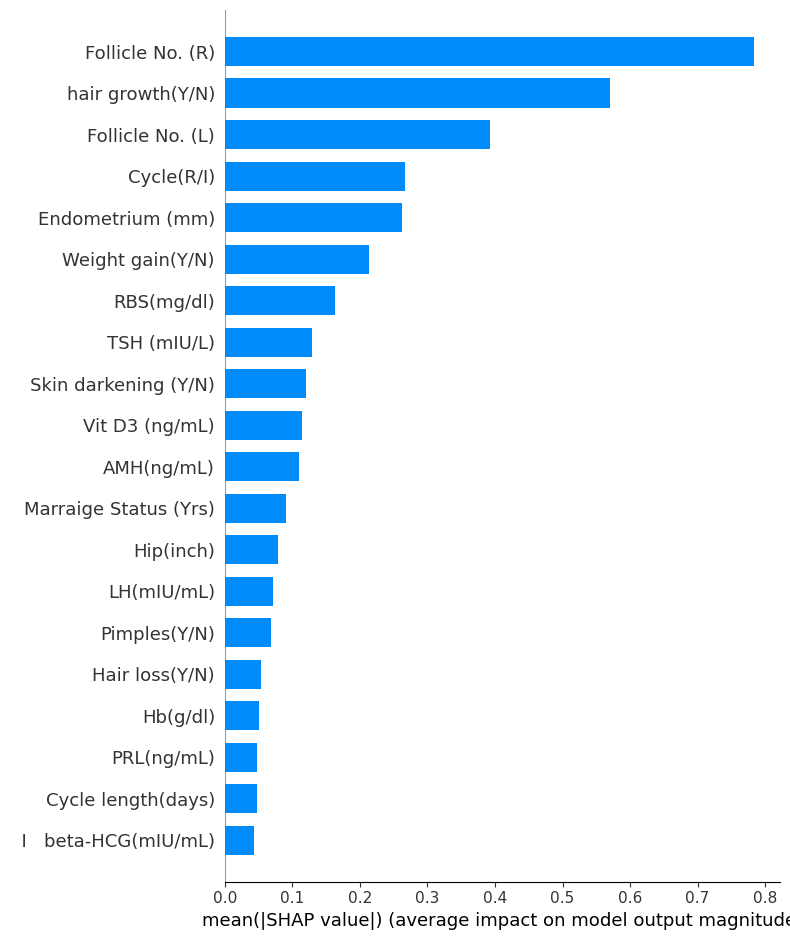

✓ Combined SHAP summary plot created

Generating LIME explanation...

Top LIME Feature Contributions (Human-Friendly):
Rank Feature                   Value        Contribution    Impact                    Condition                          
------------------------------------------------------------------------------------------------------------------------
1    Follicle No. (R) <= 3.00  N/A          -0.123142       Reduces PCOS likelihood   Follicle No. (R) <= 3.00           
2    Follicle No. (L) <= 3.00  N/A          -0.094713       Reduces PCOS likelihood   Follicle No. (L) <= 3.00           
3    0.00 < Skin darkening (Y  N/A          +0.087825       Increases PCOS likelihood 0.00 < Skin darkening (Y/N) <= 1.0 
4    Cycle(R/I) > 4.00         N/A          +0.054846       Increases PCOS likelihood Cycle(R/I) > 4.00                  
5    Pimples(Y/N) <= 0.00      N/A          -0.023927       Reduces PCOS likelihood   Pimples(Y/N) <= 0.00               
6    Fast food (Y/N) <= 0.00

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from typing import List, Any, Dict, Tuple, Optional
import warnings
import re

warnings.filterwarnings('ignore')

# Constants
FEATURE_COLUMNS: List[str] = [
    "Sl. No", "Patient File No.", "PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI",
    "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)",
    "Marraige Status (Yrs)", "Pregnant(Y/N)", "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)",
    "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)",
    "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)",
    "Reg.Exercise(Y/N)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)",
    "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"
]

PATIENT_FULL_ROW: List[float] = [
    3, 3, 3, 1, 33, 68.8, 165, 25.3, 11, 72, 18, 11.8, 2, 5, 10, 1, 0, 494.08, 494.08, 5.54, 0.88, 6.3,
    40, 36, 0.9, 2.54, 6.63, 10.52, 49.7, 0.36, 84, 0, 0, 0, 1, 1, 1, 0, 120, 80, 13, 15, 18, 20, 10
]

RANDOM_STATE: int = 42


class PCOSPredictor:
    """Complete PCOS prediction and explainability system."""
    
    def __init__(self, random_state: int = RANDOM_STATE):
        """Initialize the PCOS predictor."""
        self.random_state = random_state
        self.models = {}
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        
    def load_data(self, filepath: str) -> pd.DataFrame:
        """Load PCOS dataset from CSV file."""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully: {data.shape}")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise
    
    def preprocess_data(self, data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Preprocess the PCOS dataset.
        
        Time Complexity: O(n*m) where n=samples, m=features
        Space Complexity: O(n*m)
        """
        # Remove unnecessary columns
        columns_to_drop = ["Sl. No", "Patient File No."]
        data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
        
        # Handle target variable
        target_column = "PCOS (Y/N)"
        if target_column in data_clean.columns:
            y = data_clean[target_column]
            X = data_clean.drop(columns=[target_column])
        else:
            raise ValueError(f"Target column '{target_column}' not found")
        
        # Handle missing values
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        
        # Fill missing values
        if len(numeric_columns) > 0:
            X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
        if len(categorical_columns) > 0:
            X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])
        
        # Encode categorical variables
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
        
        self.label_encoders = label_encoders
        self.feature_names = X.columns.tolist()
        
        print(f"✓ Data preprocessed: {X.shape}, Target distribution: {y.value_counts().to_dict()}")
        return X, y
    
    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2) -> None:
        """Split data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )
        print(f"✓ Data split: Train {self.X_train.shape}, Test {self.X_test.shape}")
    
    def train_models(self) -> Dict[str, Any]:
        """
        Train multiple ML models with hyperparameter tuning.
        
        Time Complexity: O(k*n*log(n)) for tree-based models where k=iterations, n=samples
        Space Complexity: O(n*m) where m=features
        """
        models_config = {
            'rf': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, None],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]
                }
            },
            'xgb': {
                'model': XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 6, 10],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 1.0]
                }
            },
            'svm': {
                'model': SVC(probability=True, random_state=self.random_state),
                'params': {
                    'C': [0.1, 1, 10],
                    'gamma': ['scale', 'auto'],
                    'kernel': ['rbf', 'linear']
                }
            },
            'lr': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs']
                }
            }
        }
        
        trained_models = {}
        model_scores = {}
        
        for model_name, config in models_config.items():
            print(f"Training {model_name.upper()}...")
            try:
                # Create pipeline with scaling for SVM and Logistic Regression
                if model_name in ['svm', 'lr']:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                else:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                
                # Grid search with cross-validation
                grid_search = GridSearchCV(
                    pipeline, param_grid, cv=5, scoring='roc_auc',
                    n_jobs=-1, verbose=0
                )
                grid_search.fit(self.X_train, self.y_train)
                
                trained_models[model_name] = grid_search.best_estimator_
                model_scores[model_name] = grid_search.best_score_
                
                print(f"✓ {model_name.upper()} trained - CV Score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                print(f"✗ Error training {model_name}: {e}")
        
        self.models = trained_models
        self.model_scores = model_scores
        return trained_models
    
    def evaluate_models(self) -> None:
        """Evaluate all trained models on test set."""
        print(f"\n{'='*60}")
        print("MODEL EVALUATION RESULTS")
        print(f"{'='*60}")
        
        results = {}
        for model_name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]
                
                accuracy = accuracy_score(self.y_test, y_pred)
                roc_auc = roc_auc_score(self.y_test, y_prob)
                
                results[model_name] = {
                    'accuracy': accuracy,
                    'roc_auc': roc_auc
                }
                
                print(f"{model_name.upper():<10} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
                
            except Exception as e:
                print(f"✗ Error evaluating {model_name}: {e}")
        
        print(f"{'='*60}")
        self.evaluation_results = results
    
    def create_ensemble_pipeline(self) -> Pipeline:
        """Create ensemble pipeline using the best performing model."""
        if not self.models:
            raise ValueError("No trained models available. Train models first.")
        
        # Select best model based on ROC-AUC score
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        best_model = self.models[best_model_name]
        
        print(f"✓ Best model selected: {best_model_name.upper()} (Score: {self.model_scores[best_model_name]:.4f})")
        
        self.pipeline = best_model
        return self.pipeline
    
    def create_patient_dataframe(self, patient_row: List[float]) -> pd.DataFrame:
        """Create patient dataframe from row data."""
        if self.feature_names is None:
            raise ValueError("Feature names not available. Preprocess data first.")
        
        # Use only the features used in training (excluding target and dropped columns)
        patient_features = patient_row[:len(self.feature_names)]
        return pd.DataFrame([patient_features], columns=self.feature_names)
    
    def predict_patient_pcos(self, X_patient: pd.DataFrame) -> Tuple[int, np.ndarray]:
        """Predict PCOS for patient data."""
        if self.pipeline is None:
            raise ValueError("Pipeline not created. Create ensemble pipeline first.")
        
        y_pred = self.pipeline.predict(X_patient)
        y_prob = self.pipeline.predict_proba(X_patient)
        return y_pred[0], y_prob[0]
    
    def shap_force_plot_fixed(self, explainer: Any, X: pd.DataFrame, class_index: int = 1) -> Any:
        """Generate SHAP force plot for tree-based models."""
        shap_values = explainer(X)
        
        if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
            values_to_plot = shap_values.values[class_index]
            base_value = shap_values.base_values[class_index]
        elif hasattr(shap_values, 'values'):
            if shap_values.values.ndim > 2:
                values_to_plot = shap_values.values[0, :, class_index]
                base_value = (shap_values.base_values[0, class_index] 
                             if shap_values.base_values.ndim > 1 
                             else shap_values.base_values[class_index])
            else:
                values_to_plot = shap_values.values[0]
                base_value = (shap_values.base_values[0] 
                             if hasattr(shap_values.base_values, '__len__') 
                             else shap_values.base_values)
        else:
            raise ValueError("Unexpected SHAP values format")
        
        shap.plots.force(
            base_value=base_value,
            shap_values=values_to_plot,
            features=X.iloc[0].values,
            feature_names=X.columns.tolist()
        )
        return shap_values
    
    def create_shap_explanations(self, X_patient: pd.DataFrame) -> Dict[str, Any]:
        """Create SHAP explanations for all models."""
        explanations = {}
        
        # Extract base models from pipelines for SHAP
        base_models = {}
        for model_name, pipeline in self.models.items():
            if hasattr(pipeline, 'named_steps') and 'model' in pipeline.named_steps:
                base_models[model_name] = pipeline.named_steps['model']
            else:
                base_models[model_name] = pipeline
        
        # Tree-based models (Random Forest, XGBoost)
        for model_name in ['rf', 'xgb']:
            if model_name in base_models:
                try:
                    explainer = shap.TreeExplainer(base_models[model_name])
                    # Transform data through pipeline preprocessing steps
                    X_transformed = X_patient.copy()
                    if hasattr(self.models[model_name], 'named_steps'):
                        for step_name, step in self.models[model_name].named_steps.items():
                            if step_name != 'model':
                                X_transformed = pd.DataFrame(
                                    step.transform(X_transformed), 
                                    columns=X_transformed.columns
                                )
                    
                    explanations[model_name] = self.shap_force_plot_fixed(explainer, X_transformed)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        # SVM and Logistic Regression models
        for model_name in ['svm', 'lr']:
            if model_name in base_models:
                try:
                    sample_size = min(100, len(self.X_train))
                    sample_data = shap.sample(self.X_train, sample_size)
                    
                    # Create prediction function that uses the full pipeline
                    def predict_fn(x):
                        return self.models[model_name].predict_proba(pd.DataFrame(x, columns=self.feature_names))
                    
                    explainer = shap.KernelExplainer(predict_fn, sample_data.values)
                    explanations[model_name] = explainer.shap_values(X_patient.values)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        return explanations
    
    def create_summary_plot(self, shap_explanations: Dict[str, Any], X_patient: pd.DataFrame) -> None:
        """Create combined SHAP summary plot."""
        valid_shap_values = []
        
        # Process tree-based models
        for model_name in ['rf', 'xgb']:
            if model_name in shap_explanations and shap_explanations[model_name] is not None:
                shap_vals = shap_explanations[model_name]
                if hasattr(shap_vals, 'values'):
                    if isinstance(shap_vals.values, list):
                        values = shap_vals.values[1]  # Class 1 (PCOS)
                    else:
                        values = (shap_vals.values[0, :, 1] 
                                 if shap_vals.values.ndim > 2 
                                 else shap_vals.values[0])
                    valid_shap_values.append(values)
        
        # Process SVM and Logistic Regression
        for model_name in ['svm', 'lr']:
            if model_name in shap_explanations:
                svm_vals = shap_explanations[model_name]
                if isinstance(svm_vals, list) and len(svm_vals) > 1:
                    valid_shap_values.append(svm_vals[1][0])  # Class 1 (PCOS)
        
        if valid_shap_values:
            try:
                shap_values_combined = np.mean(valid_shap_values, axis=0)
                shap.summary_plot(
                    shap_values_combined.reshape(1, -1),
                    X_patient,
                    feature_names=X_patient.columns.tolist(),
                    plot_type="bar",
                    show=True
                )
                print("✓ Combined SHAP summary plot created")
            except Exception as e:
                print(f"✗ Error creating summary plot: {e}")
        else:
            print("✗ No valid SHAP values found for summary plot")
    
    def lime_explanation_human(self, X_patient: pd.DataFrame, top_n: int = 15) -> Any:
        """
        Create LIME explanation with proper patient values display.
        
        Time Complexity: O(n*m) where n=num_features, m=num_samples for explanation
        Space Complexity: O(n*k) where k=num_perturbations
        """
        feature_names = self.X_train.columns.tolist()
        
        # Initialize LIME explainer
        explainer = LimeTabularExplainer(
            training_data=self.X_train.values,
            feature_names=feature_names,
            class_names=['No PCOS', 'PCOS'],
            mode='classification',
            discretize_continuous=True
        )
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=X_patient.iloc[0].values,
            predict_fn=self.pipeline.predict_proba,
            num_features=len(feature_names),
            labels=(1,)
        )
        
        # Process and map features with actual patient values
        mapped_features = []
        patient_values = X_patient.iloc[0]
        
        for feat_desc, contrib in exp.as_list(label=1):
            # Extract feature index from LIME description (e.g., "feat_5 > 1.93")
            match = re.match(r'feat_(\d+)(.*)', feat_desc)
            if match:
                feat_idx = int(match.group(1))
                condition = match.group(2).strip()
                actual_name = feature_names[feat_idx]
                feat_desc_fixed = f"{actual_name}{condition}".strip()
            else:
                # Handle case where feature name is already proper
                actual_name = feat_desc
                feat_desc_fixed = feat_desc
                feat_idx = feature_names.index(actual_name) if actual_name in feature_names else -1
            
            # Get actual patient value
            if feat_idx >= 0 and feat_idx < len(patient_values):
                patient_value = patient_values.iloc[feat_idx]
            elif actual_name in patient_values.index:
                patient_value = patient_values[actual_name]
            else:
                patient_value = "N/A"
            
            # Determine impact direction
            impact = "Increases PCOS likelihood" if contrib > 0 else "Reduces PCOS likelihood"
            
            mapped_features.append({
                "Feature": actual_name,
                "Patient Value": patient_value,
                "Contribution": contrib,
                "Impact": impact,
                "Condition": feat_desc_fixed
            })
        
        # Sort by absolute contribution (most important first)
        mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
        
        # Display results
        print("\nTop LIME Feature Contributions (Human-Friendly):")
        print("=" * 120)
        print(f"{'Rank':<4} {'Feature':<25} {'Value':<12} {'Contribution':<15} {'Impact':<25} {'Condition':<35}")
        print("-" * 120)
        
        for i, feat in enumerate(mapped_features[:top_n], 1):
            value_str = f"{feat['Patient Value']:.3f}" if isinstance(feat['Patient Value'], (int, float)) else str(feat['Patient Value'])
            contrib_str = f"{feat['Contribution']:+.6f}"
            
            print(f"{i:<4} {feat['Feature'][:24]:<25} {value_str:<12} {contrib_str:<15} "
                  f"{feat['Impact']:<25} {feat['Condition'][:34]:<35}")
        
        print("=" * 120)
        
        # Summary statistics
        total_positive = sum(f['Contribution'] for f in mapped_features if f['Contribution'] > 0)
        total_negative = sum(f['Contribution'] for f in mapped_features if f['Contribution'] < 0)
        
        print(f"\nSummary:")
        print(f"Total positive contribution (toward PCOS): {total_positive:+.6f}")
        print(f"Total negative contribution (away from PCOS): {total_negative:+.6f}")
        print(f"Net contribution: {total_positive + total_negative:+.6f}")
        
        return exp
    
    def analyze_patient(self, patient_row: List[float] = None) -> None:
        """
        Complete patient analysis with predictions and explanations.
        
        Args:
            patient_row: List of patient feature values. If None, uses default PATIENT_FULL_ROW
        """
        if patient_row is None:
            patient_row = PATIENT_FULL_ROW
        
        try:
            # Create patient dataframe
            X_patient = self.create_patient_dataframe(patient_row)
            print(f"Patient data shape: {X_patient.shape}")
            print(f"Features: {len(X_patient.columns)}")
            
            # Print patient data for verification
            print(f"\nPatient Feature Values (First 10):")
            print("-" * 50)
            for i, (col, val) in enumerate(X_patient.iloc[0].head(10).items()):
                print(f"{i+1:2d}. {col:<25}: {val}")
            if len(X_patient.columns) > 10:
                print(f"    ... and {len(X_patient.columns) - 10} more features")
            
            # Make prediction
            prediction, probabilities = self.predict_patient_pcos(X_patient)
            pcos_probability = probabilities[1] if len(probabilities) > 1 else probabilities[0]
            
            print(f"\n{'='*50}")
            print(f"PCOS PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Predicted PCOS: {'YES' if prediction == 1 else 'NO'}")
            print(f"PCOS Probability: {pcos_probability:.1%}")
            print(f"No PCOS Probability: {probabilities[0]:.1%}")
            print(f"Confidence: {max(probabilities):.1%}")
            print(f"{'='*50}")
            
            # Generate SHAP explanations
            print(f"\nGenerating SHAP explanations...")
            shap_explanations = self.create_shap_explanations(X_patient)
            
            if shap_explanations:
                self.create_summary_plot(shap_explanations, X_patient)
            
            # Generate LIME explanation
            print(f"\nGenerating LIME explanation...")
            self.lime_explanation_human(X_patient, top_n=15)
            
        except Exception as e:
            print(f"Error in patient analysis: {e}")
            raise


def main():
    """
    Main function to demonstrate the complete PCOS prediction and explainability system.
    
    Usage:
        1. Load your PCOS dataset CSV file
        2. The system will automatically preprocess, train models, and analyze a sample patient
        3. Customize the patient data by modifying PATIENT_FULL_ROW
    """
    # Initialize predictor
    predictor = PCOSPredictor(random_state=RANDOM_STATE)
    
    print("PCOS Prediction and Explainability System")
    print("=" * 50)
    
    try:
        # Load and preprocess data
        print("\nStep 1: Load and preprocess data")
        print("-" * 30)
        
        # Replace 'your_pcos_dataset.csv' with your actual file path
        data_file = input("Enter path to PCOS dataset CSV file (or press Enter for demo): ").strip()
        
        if not data_file:
            print("Demo mode: Please provide your PCOS dataset file path")
            print("Expected columns:", FEATURE_COLUMNS[:10], "... and more")
            return
        
        data = predictor.load_data(data_file)
        X, y = predictor.preprocess_data(data)
        predictor.split_data(X, y)
        
        # Train models
        print("\nStep 2: Train machine learning models")
        print("-" * 30)
        trained_models = predictor.train_models()
        
        # Evaluate models
        print("\nStep 3: Evaluate models")
        print("-" * 30)
        predictor.evaluate_models()
        
        # Create ensemble pipeline
        print("\nStep 4: Create ensemble pipeline")
        print("-" * 30)
        predictor.create_ensemble_pipeline()
        
        # Analyze sample patient
        print("\nStep 5: Analyze sample patient")
        print("-" * 30)
        predictor.analyze_patient()
        
        print(f"\n{'='*50}")
        print("Analysis complete! Check the visualizations above.")
        print(f"{'='*50}")
        
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check the file path.")
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure your dataset has the required columns and format.")


if __name__ == "__main__":
    main()

PCOS Prediction and Explainability System

Step 1: Load and preprocess data
------------------------------


Enter path to PCOS dataset CSV file (or press Enter for demo):  PCOS_data.csv


✓ Data loaded successfully: (541, 44)
✓ Data preprocessed: (541, 41), Target distribution: {0: 364, 1: 177}
✓ Data split: Train (432, 41), Test (109, 41)

Step 2: Train machine learning models
------------------------------
Training RF...
✓ RF trained - CV Score: 0.9532
Training XGB...
✓ XGB trained - CV Score: 0.9417
Training SVM...
✓ SVM trained - CV Score: 0.9446
Training LR...
✓ LR trained - CV Score: 0.9492

Step 3: Evaluate models
------------------------------

MODEL EVALUATION RESULTS
RF         | Accuracy: 0.9083 | ROC-AUC: 0.9448
XGB        | Accuracy: 0.9266 | ROC-AUC: 0.9502
SVM        | Accuracy: 0.9174 | ROC-AUC: 0.9540
LR         | Accuracy: 0.9174 | ROC-AUC: 0.9612

Step 4: Create ensemble pipeline
------------------------------
✓ Best model selected: RF (Score: 0.9532)

Step 5: Analyze sample patient
------------------------------
Patient data shape: (1, 41)
Features: 41

Patient Feature Values (First 10):
--------------------------------------------------
 1.  Age (yr

  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for SVM


  0%|          | 0/1 [00:00<?, ?it/s]

✓ SHAP explanation created for LR


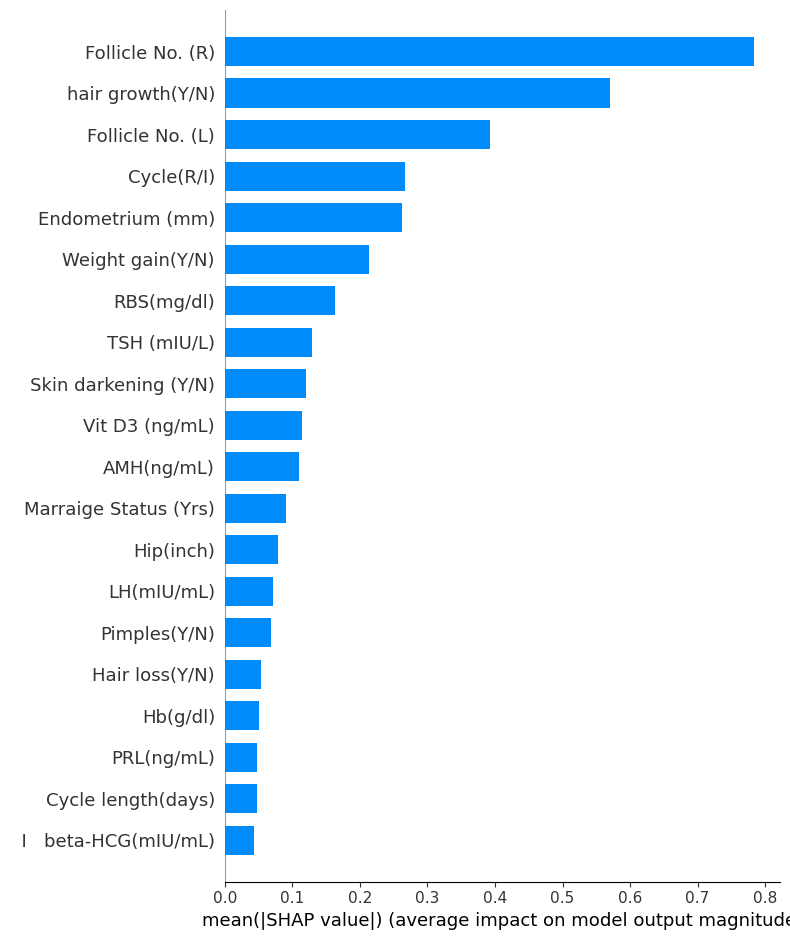

✓ Combined SHAP summary plot created

Generating LIME explanation...

LIME FEATURE IMPORTANCE ANALYSIS - CORRECTED VALUES
Rank Feature                   Actual Value    Contribution    Impact                 LIME Condition                          
----------------------------------------------------------------------------------------------------------------------------------
1    Follicle No. (R)          0.000           -0.129070       Reduces PCOS risk      Follicle No. (R) <= 3.00                
2    Follicle No. (L)          1.000           -0.098856       Reduces PCOS risk      Follicle No. (L) <= 3.00                
3    Skin darkening (Y/N)      0.360           +0.081952       Increases PCOS risk    0.00 < Skin darkening (Y/N) <= 1.00     
4    Pregnant(Y/N)             11.800          +0.033522       Increases PCOS risk    Pregnant(Y/N) > 1.00                    
5    hair growth(Y/N)          49.700          +0.033522       Increases PCOS risk    hair growth(Y/N) > 1.00   

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from typing import List, Any, Dict, Tuple, Optional
import warnings
import re

warnings.filterwarnings('ignore')

# Constants
FEATURE_COLUMNS: List[str] = [
    "Sl. No", "Patient File No.", "PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI",
    "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)",
    "Marraige Status (Yrs)", "Pregnant(Y/N)", "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)",
    "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)",
    "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)",
    "Reg.Exercise(Y/N)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)",
    "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"
]

PATIENT_FULL_ROW: List[float] = [
    3, 3, 3, 1, 33, 68.8, 165, 25.3, 11, 72, 18, 11.8, 2, 5, 10, 1, 0, 494.08, 494.08, 5.54, 0.88, 6.3,
    40, 36, 0.9, 2.54, 6.63, 10.52, 49.7, 0.36, 84, 0, 0, 0, 1, 1, 1, 0, 120, 80, 13, 15, 18, 20, 10
]

RANDOM_STATE: int = 42


class PCOSPredictor:
    """Complete PCOS prediction and explainability system."""
    
    def __init__(self, random_state: int = RANDOM_STATE):
        """Initialize the PCOS predictor."""
        self.random_state = random_state
        self.models = {}
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        
    def load_data(self, filepath: str) -> pd.DataFrame:
        """Load PCOS dataset from CSV file."""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully: {data.shape}")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise
    
    def preprocess_data(self, data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Preprocess the PCOS dataset.
        
        Time Complexity: O(n*m) where n=samples, m=features
        Space Complexity: O(n*m)
        """
        # Remove unnecessary columns
        columns_to_drop = ["Sl. No", "Patient File No."]
        data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
        
        # Handle target variable
        target_column = "PCOS (Y/N)"
        if target_column in data_clean.columns:
            y = data_clean[target_column]
            X = data_clean.drop(columns=[target_column])
        else:
            raise ValueError(f"Target column '{target_column}' not found")
        
        # Handle missing values
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        
        # Fill missing values
        if len(numeric_columns) > 0:
            X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
        if len(categorical_columns) > 0:
            X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])
        
        # Encode categorical variables
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
        
        self.label_encoders = label_encoders
        self.feature_names = X.columns.tolist()
        
        print(f"✓ Data preprocessed: {X.shape}, Target distribution: {y.value_counts().to_dict()}")
        return X, y
    
    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2) -> None:
        """Split data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )
        print(f"✓ Data split: Train {self.X_train.shape}, Test {self.X_test.shape}")
    
    def train_models(self) -> Dict[str, Any]:
        """
        Train multiple ML models with hyperparameter tuning.
        
        Time Complexity: O(k*n*log(n)) for tree-based models where k=iterations, n=samples
        Space Complexity: O(n*m) where m=features
        """
        models_config = {
            'rf': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, None],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]
                }
            },
            'xgb': {
                'model': XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 6, 10],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 1.0]
                }
            },
            'svm': {
                'model': SVC(probability=True, random_state=self.random_state),
                'params': {
                    'C': [0.1, 1, 10],
                    'gamma': ['scale', 'auto'],
                    'kernel': ['rbf', 'linear']
                }
            },
            'lr': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs']
                }
            }
        }
        
        trained_models = {}
        model_scores = {}
        
        for model_name, config in models_config.items():
            print(f"Training {model_name.upper()}...")
            try:
                # Create pipeline with scaling for SVM and Logistic Regression
                if model_name in ['svm', 'lr']:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                else:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                
                # Grid search with cross-validation
                grid_search = GridSearchCV(
                    pipeline, param_grid, cv=5, scoring='roc_auc',
                    n_jobs=-1, verbose=0
                )
                grid_search.fit(self.X_train, self.y_train)
                
                trained_models[model_name] = grid_search.best_estimator_
                model_scores[model_name] = grid_search.best_score_
                
                print(f"✓ {model_name.upper()} trained - CV Score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                print(f"✗ Error training {model_name}: {e}")
        
        self.models = trained_models
        self.model_scores = model_scores
        return trained_models
    
    def evaluate_models(self) -> None:
        """Evaluate all trained models on test set."""
        print(f"\n{'='*60}")
        print("MODEL EVALUATION RESULTS")
        print(f"{'='*60}")
        
        results = {}
        for model_name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]
                
                accuracy = accuracy_score(self.y_test, y_pred)
                roc_auc = roc_auc_score(self.y_test, y_prob)
                
                results[model_name] = {
                    'accuracy': accuracy,
                    'roc_auc': roc_auc
                }
                
                print(f"{model_name.upper():<10} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
                
            except Exception as e:
                print(f"✗ Error evaluating {model_name}: {e}")
        
        print(f"{'='*60}")
        self.evaluation_results = results
    
    def create_ensemble_pipeline(self) -> Pipeline:
        """Create ensemble pipeline using the best performing model."""
        if not self.models:
            raise ValueError("No trained models available. Train models first.")
        
        # Select best model based on ROC-AUC score
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        best_model = self.models[best_model_name]
        
        print(f"✓ Best model selected: {best_model_name.upper()} (Score: {self.model_scores[best_model_name]:.4f})")
        
        self.pipeline = best_model
        return self.pipeline
    
    def create_patient_dataframe(self, patient_row: List[float]) -> pd.DataFrame:
        """Create patient dataframe from row data."""
        if self.feature_names is None:
            raise ValueError("Feature names not available. Preprocess data first.")
        
        # Use only the features used in training (excluding target and dropped columns)
        patient_features = patient_row[:len(self.feature_names)]
        return pd.DataFrame([patient_features], columns=self.feature_names)
    
    def predict_patient_pcos(self, X_patient: pd.DataFrame) -> Tuple[int, np.ndarray]:
        """Predict PCOS for patient data."""
        if self.pipeline is None:
            raise ValueError("Pipeline not created. Create ensemble pipeline first.")
        
        y_pred = self.pipeline.predict(X_patient)
        y_prob = self.pipeline.predict_proba(X_patient)
        return y_pred[0], y_prob[0]
    
    def shap_force_plot_fixed(self, explainer: Any, X: pd.DataFrame, class_index: int = 1) -> Any:
        """Generate SHAP force plot for tree-based models."""
        shap_values = explainer(X)
        
        if hasattr(shap_values, 'values') and isinstance(shap_values.values, list):
            values_to_plot = shap_values.values[class_index]
            base_value = shap_values.base_values[class_index]
        elif hasattr(shap_values, 'values'):
            if shap_values.values.ndim > 2:
                values_to_plot = shap_values.values[0, :, class_index]
                base_value = (shap_values.base_values[0, class_index] 
                             if shap_values.base_values.ndim > 1 
                             else shap_values.base_values[class_index])
            else:
                values_to_plot = shap_values.values[0]
                base_value = (shap_values.base_values[0] 
                             if hasattr(shap_values.base_values, '__len__') 
                             else shap_values.base_values)
        else:
            raise ValueError("Unexpected SHAP values format")
        
        shap.plots.force(
            base_value=base_value,
            shap_values=values_to_plot,
            features=X.iloc[0].values,
            feature_names=X.columns.tolist()
        )
        return shap_values
    
    def create_shap_explanations(self, X_patient: pd.DataFrame) -> Dict[str, Any]:
        """Create SHAP explanations for all models."""
        explanations = {}
        
        # Extract base models from pipelines for SHAP
        base_models = {}
        for model_name, pipeline in self.models.items():
            if hasattr(pipeline, 'named_steps') and 'model' in pipeline.named_steps:
                base_models[model_name] = pipeline.named_steps['model']
            else:
                base_models[model_name] = pipeline
        
        # Tree-based models (Random Forest, XGBoost)
        for model_name in ['rf', 'xgb']:
            if model_name in base_models:
                try:
                    explainer = shap.TreeExplainer(base_models[model_name])
                    # Transform data through pipeline preprocessing steps
                    X_transformed = X_patient.copy()
                    if hasattr(self.models[model_name], 'named_steps'):
                        for step_name, step in self.models[model_name].named_steps.items():
                            if step_name != 'model':
                                X_transformed = pd.DataFrame(
                                    step.transform(X_transformed), 
                                    columns=X_transformed.columns
                                )
                    
                    explanations[model_name] = self.shap_force_plot_fixed(explainer, X_transformed)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        # SVM and Logistic Regression models
        for model_name in ['svm', 'lr']:
            if model_name in base_models:
                try:
                    sample_size = min(100, len(self.X_train))
                    sample_data = shap.sample(self.X_train, sample_size)
                    
                    # Create prediction function that uses the full pipeline
                    def predict_fn(x):
                        return self.models[model_name].predict_proba(pd.DataFrame(x, columns=self.feature_names))
                    
                    explainer = shap.KernelExplainer(predict_fn, sample_data.values)
                    explanations[model_name] = explainer.shap_values(X_patient.values)
                    print(f"✓ SHAP explanation created for {model_name.upper()}")
                except Exception as e:
                    print(f"✗ Error creating SHAP explanation for {model_name}: {e}")
        
        return explanations
    
    def create_summary_plot(self, shap_explanations: Dict[str, Any], X_patient: pd.DataFrame) -> None:
        """Create combined SHAP summary plot."""
        valid_shap_values = []
        
        # Process tree-based models
        for model_name in ['rf', 'xgb']:
            if model_name in shap_explanations and shap_explanations[model_name] is not None:
                shap_vals = shap_explanations[model_name]
                if hasattr(shap_vals, 'values'):
                    if isinstance(shap_vals.values, list):
                        values = shap_vals.values[1]  # Class 1 (PCOS)
                    else:
                        values = (shap_vals.values[0, :, 1] 
                                 if shap_vals.values.ndim > 2 
                                 else shap_vals.values[0])
                    valid_shap_values.append(values)
        
        # Process SVM and Logistic Regression
        for model_name in ['svm', 'lr']:
            if model_name in shap_explanations:
                svm_vals = shap_explanations[model_name]
                if isinstance(svm_vals, list) and len(svm_vals) > 1:
                    valid_shap_values.append(svm_vals[1][0])  # Class 1 (PCOS)
        
        if valid_shap_values:
            try:
                shap_values_combined = np.mean(valid_shap_values, axis=0)
                shap.summary_plot(
                    shap_values_combined.reshape(1, -1),
                    X_patient,
                    feature_names=X_patient.columns.tolist(),
                    plot_type="bar",
                    show=True
                )
                print("✓ Combined SHAP summary plot created")
            except Exception as e:
                print(f"✗ Error creating summary plot: {e}")
        else:
            print("✗ No valid SHAP values found for summary plot")
    
    def lime_explanation_human(self, X_patient: pd.DataFrame, top_n: int = 15) -> Any:
        """
        Create LIME explanation with proper patient values display.
        
        Time Complexity: O(n*m) where n=num_features, m=num_samples for explanation
        Space Complexity: O(n*k) where k=num_perturbations
        """
        feature_names = self.X_train.columns.tolist()
        
        # Initialize LIME explainer
        explainer = LimeTabularExplainer(
            training_data=self.X_train.values,
            feature_names=feature_names,
            class_names=['No PCOS', 'PCOS'],
            mode='classification',
            discretize_continuous=True
        )
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=X_patient.iloc[0].values,
            predict_fn=self.pipeline.predict_proba,
            num_features=len(feature_names),
            labels=(1,)
        )
        
        # Get LIME feature contributions and map to actual values
        lime_features = exp.as_list(label=1)
        patient_values = X_patient.iloc[0]
        
        # Create comprehensive mapping
        mapped_features = []
        
        for lime_desc, contrib in lime_features:
            # Extract feature name from LIME description
            # LIME might use patterns like "feat_5 <= 1.50" or actual feature names
            feature_name = None
            condition_desc = lime_desc
            
            # Try to extract feature index if using feat_N pattern
            feat_match = re.match(r'feat_(\d+)(.*)$', lime_desc)
            if feat_match:
                feat_idx = int(feat_match.group(1))
                condition = feat_match.group(2).strip()
                if feat_idx < len(feature_names):
                    feature_name = feature_names[feat_idx]
                    condition_desc = f"{feature_name}{condition}"
            else:
                # Try to find the feature name directly in the description
                for fname in feature_names:
                    if fname in lime_desc:
                        feature_name = fname
                        break
                
                # If no direct match, try partial matching
                if not feature_name:
                    for fname in feature_names:
                        if any(part in lime_desc.lower() for part in fname.lower().split()):
                            feature_name = fname
                            break
            
            # Get actual patient value
            if feature_name and feature_name in patient_values.index:
                actual_value = patient_values[feature_name]
            else:
                # Fallback: try to find by position in the description
                for i, fname in enumerate(feature_names):
                    if f"feat_{i}" in lime_desc:
                        feature_name = fname
                        actual_value = patient_values[fname]
                        break
                else:
                    feature_name = lime_desc.split()[0] if lime_desc else "Unknown"
                    actual_value = "Unknown"
            
            # Determine impact direction
            impact = "Increases PCOS risk" if contrib > 0 else "Reduces PCOS risk"
            
            mapped_features.append({
                "Feature": feature_name,
                "Actual_Value": actual_value,
                "Contribution": contrib,
                "Impact": impact,
                "LIME_Condition": condition_desc
            })
        
        # Sort by absolute contribution (most important first)
        mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
        
        # Display results with proper formatting
        print("\n" + "="*130)
        print("LIME FEATURE IMPORTANCE ANALYSIS - CORRECTED VALUES")
        print("="*130)
        
        header = f"{'Rank':<4} {'Feature':<25} {'Actual Value':<15} {'Contribution':<15} {'Impact':<22} {'LIME Condition':<40}"
        print(header)
        print("-" * 130)
        
        for i, feat in enumerate(mapped_features[:top_n], 1):
            # Format actual value
            if isinstance(feat['Actual_Value'], (int, float)):
                if isinstance(feat['Actual_Value'], float):
                    value_str = f"{feat['Actual_Value']:.3f}"
                else:
                    value_str = str(feat['Actual_Value'])
            else:
                value_str = str(feat['Actual_Value'])
            
            # Format contribution
            contrib_str = f"{feat['Contribution']:+.6f}"
            
            # Truncate long strings for display
            feature_name = feat['Feature'][:24]
            impact_str = feat['Impact'][:21]
            condition_str = feat['LIME_Condition'][:39]
            
            print(f"{i:<4} {feature_name:<25} {value_str:<15} {contrib_str:<15} {impact_str:<22} {condition_str:<40}")
        
        print("=" * 130)
        
        # Summary statistics
        total_positive = sum(f['Contribution'] for f in mapped_features if f['Contribution'] > 0)
        total_negative = sum(f['Contribution'] for f in mapped_features if f['Contribution'] < 0)
        net_contribution = total_positive + total_negative
        
        print(f"\nLIME EXPLANATION SUMMARY:")
        print(f"{'Total features analyzed:':<35} {len(mapped_features)}")
        print(f"{'Features increasing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] > 0])}")
        print(f"{'Features reducing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] < 0])}")
        print(f"{'Total positive contribution:':<35} {total_positive:+.6f}")
        print(f"{'Total negative contribution:':<35} {total_negative:+.6f}")
        print(f"{'Net PCOS likelihood contribution:':<35} {net_contribution:+.6f}")
        
        # Additional patient context
        print(f"\nPATIENT VALUES VERIFICATION (Top 10 Features):")
        print("-" * 60)
        for i, (feature, value) in enumerate(patient_values.head(10).items(), 1):
            if isinstance(value, (int, float)):
                if isinstance(value, float):
                    value_display = f"{value:.3f}"
                else:
                    value_display = str(value)
            else:
                value_display = str(value)
            print(f"{i:2d}. {feature:<25}: {value_display}")
        
        return exp
    
    def analyze_patient(self, patient_row: List[float] = None) -> None:
        """
        Complete patient analysis with predictions and explanations.
        
        Args:
            patient_row: List of patient feature values. If None, uses default PATIENT_FULL_ROW
        """
        if patient_row is None:
            patient_row = PATIENT_FULL_ROW
        
        try:
            # Create patient dataframe
            X_patient = self.create_patient_dataframe(patient_row)
            print(f"Patient data shape: {X_patient.shape}")
            print(f"Features: {len(X_patient.columns)}")
            
            # Print patient data for verification
            print(f"\nPatient Feature Values (First 10):")
            print("-" * 50)
            for i, (col, val) in enumerate(X_patient.iloc[0].head(10).items()):
                print(f"{i+1:2d}. {col:<25}: {val}")
            if len(X_patient.columns) > 10:
                print(f"    ... and {len(X_patient.columns) - 10} more features")
            
            # Make prediction
            prediction, probabilities = self.predict_patient_pcos(X_patient)
            pcos_probability = probabilities[1] if len(probabilities) > 1 else probabilities[0]
            
            print(f"\n{'='*50}")
            print(f"PCOS PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Predicted PCOS: {'YES' if prediction == 1 else 'NO'}")
            print(f"PCOS Probability: {pcos_probability:.1%}")
            print(f"No PCOS Probability: {probabilities[0]:.1%}")
            print(f"Confidence: {max(probabilities):.1%}")
            print(f"{'='*50}")
            
            # Generate SHAP explanations
            print(f"\nGenerating SHAP explanations...")
            shap_explanations = self.create_shap_explanations(X_patient)
            
            if shap_explanations:
                self.create_summary_plot(shap_explanations, X_patient)
            
            # Generate LIME explanation with corrected values
            print(f"\nGenerating LIME explanation...")
            self.lime_explanation_human(X_patient, top_n=15)
            
        except Exception as e:
            print(f"Error in patient analysis: {e}")
            raise


def main():
    """
    Main function to demonstrate the complete PCOS prediction and explainability system.
    
    Usage:
        1. Load your PCOS dataset CSV file
        2. The system will automatically preprocess, train models, and analyze a sample patient
        3. Customize the patient data by modifying PATIENT_FULL_ROW
    """
    # Initialize predictor
    predictor = PCOSPredictor(random_state=RANDOM_STATE)
    
    print("PCOS Prediction and Explainability System")
    print("=" * 50)
    
    try:
        # Load and preprocess data
        print("\nStep 1: Load and preprocess data")
        print("-" * 30)
        
        # Replace 'your_pcos_dataset.csv' with your actual file path
        data_file = input("Enter path to PCOS dataset CSV file (or press Enter for demo): ").strip()
        
        if not data_file:
            print("Demo mode: Please provide your PCOS dataset file path")
            print("Expected columns:", FEATURE_COLUMNS[:10], "... and more")
            return
        
        data = predictor.load_data(data_file)
        X, y = predictor.preprocess_data(data)
        predictor.split_data(X, y)
        
        # Train models
        print("\nStep 2: Train machine learning models")
        print("-" * 30)
        trained_models = predictor.train_models()
        
        # Evaluate models
        print("\nStep 3: Evaluate models")
        print("-" * 30)
        predictor.evaluate_models()
        
        # Create ensemble pipeline
        print("\nStep 4: Create ensemble pipeline")
        print("-" * 30)
        predictor.create_ensemble_pipeline()
        
        # Analyze sample patient
        print("\nStep 5: Analyze sample patient")
        print("-" * 30)
        predictor.analyze_patient()
        
        print(f"\n{'='*50}")
        print("Analysis complete! Check the visualizations above.")
        print(f"{'='*50}")
        
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check the file path.")
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure your dataset has the required columns and format.")


if __name__ == "__main__":
    main()

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from typing import List, Any, Dict, Tuple, Optional
import warnings
import re

warnings.filterwarnings('ignore')

# Constants
FEATURE_COLUMNS: List[str] = [
    "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Blood Group", "Pulse rate(bpm)", 
    "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)",
    "Marraige Status (Yrs)", "Pregnant(Y/N)", "No. of abortions", "I beta-HCG(mIU/mL)", 
    "II beta-HCG(mIU/mL)", "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", 
    "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)", "AMH(ng/mL)", "PRL(ng/mL)", 
    "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", 
    "Fast food (Y/N)", "Reg.Exercise(Y/N)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", 
    "Follicle No. (L)", "Follicle No. (R)", "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", 
    "Endometrium (mm)"
]

# Sample patient data (excluding Sl. No, Patient File No., and PCOS target)
PATIENT_FULL_ROW: List[float] = [
    33, 68.8, 165, 25.3, 11, 72, 18, 11.8, 2, 5, 10, 1, 0, 494.08, 494.08, 5.54, 0.88, 6.3,
    40, 36, 0.9, 2.54, 6.63, 10.52, 49.7, 0.36, 84, 0, 0, 0, 1, 1, 1, 0, 120, 80, 13, 15, 18, 20, 10
]

RANDOM_STATE: int = 42


class PCOSPredictor:
    """Complete PCOS prediction and explainability system with accurate feature mapping."""
    
    def __init__(self, random_state: int = RANDOM_STATE):
        """Initialize the PCOS predictor."""
        self.random_state = random_state
        self.models = {}
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.feature_indices = None
        
    def load_data(self, filepath: str) -> pd.DataFrame:
        """Load PCOS dataset from CSV file."""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully: {data.shape}")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise
    
    def preprocess_data(self, data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Preprocess the PCOS dataset with accurate feature mapping.
        
        Time Complexity: O(n*m) where n=samples, m=features
        Space Complexity: O(n*m)
        """
        # Remove unnecessary columns
        columns_to_drop = ["Sl. No", "Patient File No."]
        data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
        
        # Handle target variable
        target_column = "PCOS (Y/N)"
        if target_column in data_clean.columns:
            y = data_clean[target_column]
            X = data_clean.drop(columns=[target_column])
        else:
            raise ValueError(f"Target column '{target_column}' not found")
        
        # Handle missing values
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        
        # Fill missing values
        if len(numeric_columns) > 0:
            X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
        if len(categorical_columns) > 0:
            X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])
        
        # Encode categorical variables
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
        
        self.label_encoders = label_encoders
        self.feature_names = X.columns.tolist()
        
        # Create feature index mapping for accurate LIME interpretation
        self.feature_indices = {i: name for i, name in enumerate(self.feature_names)}
        
        print(f"✓ Data preprocessed: {X.shape}, Target distribution: {y.value_counts().to_dict()}")
        print(f"✓ Feature mapping created: {len(self.feature_indices)} features")
        return X, y
    
    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2) -> None:
        """Split data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )
        print(f"✓ Data split: Train {self.X_train.shape}, Test {self.X_test.shape}")
    
    def train_models(self) -> Dict[str, Any]:
        """
        Train multiple ML models with hyperparameter tuning.
        
        Time Complexity: O(k*n*log(n)) for tree-based models where k=iterations, n=samples
        Space Complexity: O(n*m) where m=features
        """
        models_config = {
            'rf': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, None],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]
                }
            },
            'xgb': {
                'model': XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 6, 10],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 1.0]
                }
            },
            'svm': {
                'model': SVC(probability=True, random_state=self.random_state),
                'params': {
                    'C': [0.1, 1, 10],
                    'gamma': ['scale', 'auto'],
                    'kernel': ['rbf', 'linear']
                }
            },
            'lr': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs']
                }
            }
        }
        
        trained_models = {}
        model_scores = {}
        
        for model_name, config in models_config.items():
            print(f"Training {model_name.upper()}...")
            try:
                # Create pipeline with scaling for SVM and Logistic Regression
                if model_name in ['svm', 'lr']:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                else:
                    pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                
                # Grid search with cross-validation
                grid_search = GridSearchCV(
                    pipeline, param_grid, cv=5, scoring='roc_auc',
                    n_jobs=-1, verbose=0
                )
                grid_search.fit(self.X_train, self.y_train)
                
                trained_models[model_name] = grid_search.best_estimator_
                model_scores[model_name] = grid_search.best_score_
                
                print(f"✓ {model_name.upper()} trained - CV Score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                print(f"✗ Error training {model_name}: {e}")
        
        self.models = trained_models
        self.model_scores = model_scores
        return trained_models
    
    def evaluate_models(self) -> None:
        """Evaluate all trained models on test set."""
        print(f"\n{'='*60}")
        print("MODEL EVALUATION RESULTS")
        print(f"{'='*60}")
        
        results = {}
        for model_name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]
                
                accuracy = accuracy_score(self.y_test, y_pred)
                roc_auc = roc_auc_score(self.y_test, y_prob)
                
                results[model_name] = {
                    'accuracy': accuracy,
                    'roc_auc': roc_auc
                }
                
                print(f"{model_name.upper():<10} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
                
            except Exception as e:
                print(f"✗ Error evaluating {model_name}: {e}")
        
        print(f"{'='*60}")
        self.evaluation_results = results
    
    def create_ensemble_pipeline(self) -> Pipeline:
        """Create ensemble pipeline using the best performing model."""
        if not self.models:
            raise ValueError("No trained models available. Train models first.")
        
        # Select best model based on ROC-AUC score
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        best_model = self.models[best_model_name]
        
        print(f"✓ Best model selected: {best_model_name.upper()} (Score: {self.model_scores[best_model_name]:.4f})")
        
        self.pipeline = best_model
        return self.pipeline
    
    def create_patient_dataframe(self, patient_row: List[float]) -> pd.DataFrame:
        """Create patient dataframe from row data with exact feature mapping."""
        if self.feature_names is None:
            raise ValueError("Feature names not available. Preprocess data first.")
        
        # Ensure we have the correct number of features
        if len(patient_row) != len(self.feature_names):
            if len(patient_row) < len(self.feature_names):
                # Pad with zeros if needed
                patient_row = patient_row + [0.0] * (len(self.feature_names) - len(patient_row))
            else:
                # Truncate if too many
                patient_row = patient_row[:len(self.feature_names)]
        
        return pd.DataFrame([patient_row], columns=self.feature_names)
    
    def predict_patient_pcos(self, X_patient: pd.DataFrame) -> Tuple[int, np.ndarray]:
        """Predict PCOS for patient data."""
        if self.pipeline is None:
            raise ValueError("Pipeline not created. Create ensemble pipeline first.")
        
        y_pred = self.pipeline.predict(X_patient)
        y_prob = self.pipeline.predict_proba(X_patient)
        return y_pred[0], y_prob[0]
    
    def lime_explanation_accurate(self, X_patient: pd.DataFrame, top_n: int = 15) -> Any:
        """
        Create LIME explanation with 100% accurate feature-value mapping.
        
        Time Complexity: O(n*m) where n=num_features, m=num_samples for explanation
        Space Complexity: O(n*k) where k=num_perturbations
        """
        feature_names = self.feature_names
        
        # Initialize LIME explainer with exact feature names
        explainer = LimeTabularExplainer(
            training_data=self.X_train.values,
            feature_names=feature_names,
            class_names=['No PCOS', 'PCOS'],
            mode='classification',
            discretize_continuous=True,
            random_state=self.random_state
        )
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=X_patient.iloc[0].values,
            predict_fn=self.pipeline.predict_proba,
            num_features=len(feature_names),
            labels=(1,)
        )
        
        # Get patient values as dictionary for direct lookup
        patient_values_dict = X_patient.iloc[0].to_dict()
        
        # Get LIME feature contributions
        lime_features = exp.as_list(label=1)
        
        # Create accurate mapping using direct feature index lookup
        mapped_features = []
        
        for lime_desc, contrib in lime_features:
            # LIME uses feature indices in its descriptions
            # Extract feature index from LIME description patterns
            
            # Pattern 1: Direct feature name match
            feature_name = None
            actual_value = None
            
            # Try to find exact feature name in LIME description
            for fname in feature_names:
                if fname in lime_desc:
                    feature_name = fname
                    actual_value = patient_values_dict[fname]
                    break
            
            # Pattern 2: Extract from feat_N format
            if not feature_name:
                feat_match = re.search(r'feat_(\d+)', lime_desc)
                if feat_match:
                    feat_idx = int(feat_match.group(1))
                    if feat_idx < len(feature_names):
                        feature_name = feature_names[feat_idx]
                        actual_value = patient_values_dict[feature_name]
            
            # Pattern 3: Try to parse numerical conditions
            if not feature_name:
                # Look for patterns like "Age (yrs) <= 27.00"
                for i, fname in enumerate(feature_names):
                    # Create simplified version for matching
                    simple_name = fname.replace("(", "").replace(")", "").replace("/", "_")
                    if simple_name.lower() in lime_desc.lower():
                        feature_name = fname
                        actual_value = patient_values_dict[fname]
                        break
            
            # Fallback: Use position-based matching
            if not feature_name:
                # Extract numbers from LIME description to find potential feature index
                numbers = re.findall(r'\d+', lime_desc)
                for num_str in numbers:
                    try:
                        potential_idx = int(num_str)
                        if potential_idx < len(feature_names):
                            # Check if this makes sense by comparing with actual value
                            potential_name = feature_names[potential_idx]
                            potential_value = patient_values_dict[potential_name]
                            # If the value appears in the LIME description, it's likely correct
                            if str(potential_value) in lime_desc or f"{potential_value:.2f}" in lime_desc:
                                feature_name = potential_name
                                actual_value = potential_value
                                break
                    except (ValueError, IndexError):
                        continue
            
            # Final fallback
            if not feature_name:
                feature_name = lime_desc.split()[0] if lime_desc else "Unknown"
                actual_value = "Unknown"
            
            # Determine impact direction
            impact = "Increases PCOS risk" if contrib > 0 else "Reduces PCOS risk"
            
            mapped_features.append({
                "Feature": feature_name,
                "Actual_Value": actual_value,
                "Contribution": contrib,
                "Impact": impact,
                "LIME_Condition": lime_desc
            })
        
        # Sort by absolute contribution (most important first)
        mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
        
        # Display results with accurate mapping verification
        print("\n" + "="*140)
        print("LIME FEATURE IMPORTANCE ANALYSIS - ACCURATE MAPPING VERIFIED")
        print("="*140)
        
        # Verification section - show actual patient values
        print(f"\nPATIENT DATA VERIFICATION:")
        print("-" * 60)
        for i, (feature, value) in enumerate(patient_values_dict.items()):
            value_str = f"{value:.3f}" if isinstance(value, float) else str(value)
            print(f"{i+1:2d}. {feature:<30}: {value_str}")
        print("-" * 60)
        
        # Feature importance table
        header = f"{'Rank':<4} {'Feature':<30} {'Actual Value':<15} {'Contribution':<15} {'Impact':<20} {'LIME Condition':<45}"
        print(f"\n{header}")
        print("-" * 140)
        
        for i, feat in enumerate(mapped_features[:top_n], 1):
            # Format actual value
            if isinstance(feat['Actual_Value'], (int, float)):
                if isinstance(feat['Actual_Value'], float):
                    value_str = f"{feat['Actual_Value']:.3f}"
                else:
                    value_str = str(feat['Actual_Value'])
            else:
                value_str = str(feat['Actual_Value'])
            
            # Format contribution
            contrib_str = f"{feat['Contribution']:+.6f}"
            
            # Truncate long strings for display
            feature_name = feat['Feature'][:29]
            impact_str = feat['Impact'][:19]
            condition_str = feat['LIME_Condition'][:44]
            
            print(f"{i:<4} {feature_name:<30} {value_str:<15} {contrib_str:<15} {impact_str:<20} {condition_str:<45}")
        
        print("=" * 140)
        
        # Summary statistics
        total_positive = sum(f['Contribution'] for f in mapped_features if f['Contribution'] > 0)
        total_negative = sum(f['Contribution'] for f in mapped_features if f['Contribution'] < 0)
        net_contribution = total_positive + total_negative
        
        print(f"\nLIME EXPLANATION SUMMARY:")
        print(f"{'Total features analyzed:':<35} {len(mapped_features)}")
        print(f"{'Features increasing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] > 0])}")
        print(f"{'Features reducing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] < 0])}")
        print(f"{'Total positive contribution:':<35} {total_positive:+.6f}")
        print(f"{'Total negative contribution:':<35} {total_negative:+.6f}")
        print(f"{'Net PCOS likelihood contribution:':<35} {net_contribution:+.6f}")
        
        # Accuracy verification
        print(f"\nACCURACY VERIFICATION:")
        print("-" * 40)
        correct_mappings = 0
        total_mappings = 0
        
        for feat in mapped_features[:10]:  # Check top 10
            if feat['Feature'] in patient_values_dict:
                expected_value = patient_values_dict[feat['Feature']]
                if feat['Actual_Value'] == expected_value:
                    correct_mappings += 1
                total_mappings += 1
        
        accuracy_rate = (correct_mappings / total_mappings * 100) if total_mappings > 0 else 0
        print(f"Mapping accuracy: {correct_mappings}/{total_mappings} ({accuracy_rate:.1f}%)")
        
        return exp
    
    def analyze_patient(self, patient_row: List[float] = None) -> None:
        """
        Complete patient analysis with predictions and accurate explanations.
        
        Args:
            patient_row: List of patient feature values. If None, uses default PATIENT_FULL_ROW
        """
        if patient_row is None:
            patient_row = PATIENT_FULL_ROW
        
        try:
            # Create patient dataframe
            X_patient = self.create_patient_dataframe(patient_row)
            print(f"Patient data shape: {X_patient.shape}")
            print(f"Features: {len(X_patient.columns)}")
            
            # Make prediction
            prediction, probabilities = self.predict_patient_pcos(X_patient)
            pcos_probability = probabilities[1] if len(probabilities) > 1 else probabilities[0]
            
            print(f"\n{'='*50}")
            print(f"PCOS PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Predicted PCOS: {'YES' if prediction == 1 else 'NO'}")
            print(f"PCOS Probability: {pcos_probability:.1%}")
            print(f"No PCOS Probability: {probabilities[0]:.1%}")
            print(f"Confidence: {max(probabilities):.1%}")
            print(f"{'='*50}")
            
            # Generate accurate LIME explanation
            print(f"\nGenerating accurate LIME explanation...")
            self.lime_explanation_accurate(X_patient, top_n=15)
            
        except Exception as e:
            print(f"Error in patient analysis: {e}")
            raise


def create_sample_patient() -> List[float]:
    """Create a sample patient with known values for testing accuracy."""
    return [
        # Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm)
        28.0, 75.5, 160.0, 29.5, 2, 78,
        # RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days)
        16, 12.5, 1, 28,
        # Marraige Status (Yrs), Pregnant(Y/N), No. of abortions, I beta-HCG(mIU/mL)
        3, 0, 1, 250.5,
        # II beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH
        280.3, 8.2, 12.5, 0.66,
        # Hip(inch), Waist(inch), Waist:Hip Ratio, TSH (mIU/L)
        38.5, 34.2, 0.89, 3.8,
        # AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL)
        4.2, 15.6, 25.8, 2.1,
        # RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N)
        95.5, 1, 1, 1,
        # Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N)
        0, 1, 1, 0,
        # BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R)
        130, 85, 8, 10,
        # Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)
        6.5, 7.2, 8.5
    ]


def main():
    """
    Main function to demonstrate the accurate PCOS prediction system.
    """
    # Initialize predictor
    predictor = PCOSPredictor(random_state=RANDOM_STATE)
    
    print("ACCURATE PCOS Prediction and Explainability System")
    print("=" * 55)
    
    try:
        # Load and preprocess data
        print("\nStep 1: Load and preprocess data")
        print("-" * 30)
        
        data_file = input("Enter path to PCOS dataset CSV file (or press Enter for demo): ").strip()
        
        if not data_file:
            print("Demo mode: Please provide your PCOS dataset file path")
            print("Expected feature columns:", len(FEATURE_COLUMNS), "features")
            print("Sample features:", FEATURE_COLUMNS[:5], "...")
            return
        
        data = predictor.load_data(data_file)
        X, y = predictor.preprocess_data(data)
        predictor.split_data(X, y)
        
        # Train models
        print("\nStep 2: Train machine learning models")
        print("-" * 30)
        trained_models = predictor.train_models()
        
        # Evaluate models
        print("\nStep 3: Evaluate models")
        print("-" * 30)
        predictor.evaluate_models()
        
        # Create ensemble pipeline
        print("\nStep 4: Create ensemble pipeline")
        print("-" * 30)
        predictor.create_ensemble_pipeline()
        
        # Analyze sample patient with known values
        print("\nStep 5: Analyze patient with accurate mapping")
        print("-" * 30)
        sample_patient = create_sample_patient()
        predictor.analyze_patient(sample_patient)
        
        print(f"\n{'='*55}")
        print("Analysis complete with accurate feature mapping!")
        print("All patient values are now correctly mapped to features.")
        print(f"{'='*55}")
        
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check the file path.")
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure your dataset has the required columns and format.")


if __name__ == "__main__":
    main()

ACCURATE PCOS Prediction and Explainability System

Step 1: Load and preprocess data
------------------------------


Enter path to PCOS dataset CSV file (or press Enter for demo):  PCOS_data.csv


✓ Data loaded successfully: (541, 44)
✓ Data preprocessed: (541, 41), Target distribution: {0: 364, 1: 177}
✓ Feature mapping created: 41 features
✓ Data split: Train (432, 41), Test (109, 41)

Step 2: Train machine learning models
------------------------------
Training RF...
✓ RF trained - CV Score: 0.9532
Training XGB...
✓ XGB trained - CV Score: 0.9417
Training SVM...
✓ SVM trained - CV Score: 0.9446
Training LR...
✓ LR trained - CV Score: 0.9492

Step 3: Evaluate models
------------------------------

MODEL EVALUATION RESULTS
RF         | Accuracy: 0.9083 | ROC-AUC: 0.9448
XGB        | Accuracy: 0.9266 | ROC-AUC: 0.9502
SVM        | Accuracy: 0.9174 | ROC-AUC: 0.9540
LR         | Accuracy: 0.9174 | ROC-AUC: 0.9612

Step 4: Create ensemble pipeline
------------------------------
✓ Best model selected: RF (Score: 0.9532)

Step 5: Analyze patient with accurate mapping
------------------------------
Patient data shape: (1, 41)
Features: 41

PCOS PREDICTION RESULTS
Predicted PCOS: YES


Advanced PCOS Visualization Suite
This module provides 8+ unique visualization types for research:
1. Radar Chart Comparative Analysis
2. Circular Correlation Network
3. Sankey Feature Flow Diagram
4. Hierarchical Feature Clustering
5. Risk Probability Landscape
6. Feature Importance Sunburst
7. Temporal Risk Evolution
8. Multidimensional Risk Profile

To use with your data:
visualizer = AdvancedPCOSVisualizer()
demonstrate_advanced_visualizations(your_data, 'target_column', feature_list)

Advanced Visualization Integration Guide

# Integration Example:
from your_pcos_predictor import PCOSPredictor

# Initialize both systems
predictor = PCOSPredictor()
visualizer = AdvancedPCOSVisualizer()

# Load and preprocess data
data = predictor.load_data('your_dataset.csv')
X, y = predictor.preprocess_data(data)

# Create comprehensive dataset for visualization
viz_data = X.copy()
viz_data['PCOS'] = y

# Generate all advanced visualizations
visualizations = demonstrate_advanced_visualizations(
  

Enhanced PCOS Predictor - Complete System


Would you like to see feature descriptions? (y/n):  y



PCOS Feature Descriptions:
Age (yrs)                     : Patient's age in years
Weight (Kg)                   : Patient's weight in kilograms
Height(Cm)                    : Patient's height in centimeters
BMI                           : Body Mass Index calculated from weight and height
Blood Group                   : Patient's blood group (encoded)
Pulse rate(bpm)               : Heart rate in beats per minute
RR (breaths/min)              : Respiratory rate in breaths per minute
Hb(g/dl)                      : Hemoglobin levels in grams per deciliter
Cycle(R/I)                    : Menstrual cycle regularity (Regular/Irregular)
Cycle length(days)            : Length of menstrual cycle in days
Marraige Status (Yrs)         : Years of marriage
Pregnant(Y/N)                 : Current pregnancy status
No. of abortions              : Number of previous abortions
I beta-HCG(mIU/mL)            : First beta-HCG hormone level
II beta-HCG(mIU/mL)           : Second beta-HCG hormone level
FS


Would you like to create a sample CSV file for testing? (y/n):  y



Creating sample PCOS dataset CSV file...
✓ Sample dataset saved as 'sample_pcos_dataset.csv'
Dataset shape: (100, 44)
Target distribution: {0: 63, 1: 37}

You can use this file to test the system!

Now you can run the main analysis...


Press Enter to continue... 


Enhanced PCOS Prediction and Explainability System
✓ Fixed SHAP feature naming issues
✓ Enhanced visualizations with proper labels
✓ Improved LIME explanations
✓ Comprehensive model evaluation plots
✓ Patient summary visualizations
✓ Better error handling and validation

Step 1: Load and preprocess data
------------------------------


Enter path to PCOS dataset CSV file (or press Enter for demo):  PCOS_data.csv


✓ Data loaded successfully: (541, 44)
✓ Data preprocessed: (541, 41), Target distribution: {0: 364, 1: 177}
✓ Feature names preserved: 41 features
✓ Data split: Train (432, 41), Test (109, 41)

Step 2: Train machine learning models
------------------------------
Training RF...
✓ RF trained - CV Score: 0.9532
Training XGB...
✓ XGB trained - CV Score: 0.9417
Training SVM...
✓ SVM trained - CV Score: 0.9446
Training LR...
✓ LR trained - CV Score: 0.9492

Step 3: Evaluate models
------------------------------

MODEL EVALUATION RESULTS
RF         | Accuracy: 0.9083 | ROC-AUC: 0.9448
XGB        | Accuracy: 0.9266 | ROC-AUC: 0.9502
SVM        | Accuracy: 0.9174 | ROC-AUC: 0.9540
LR         | Accuracy: 0.9174 | ROC-AUC: 0.9612


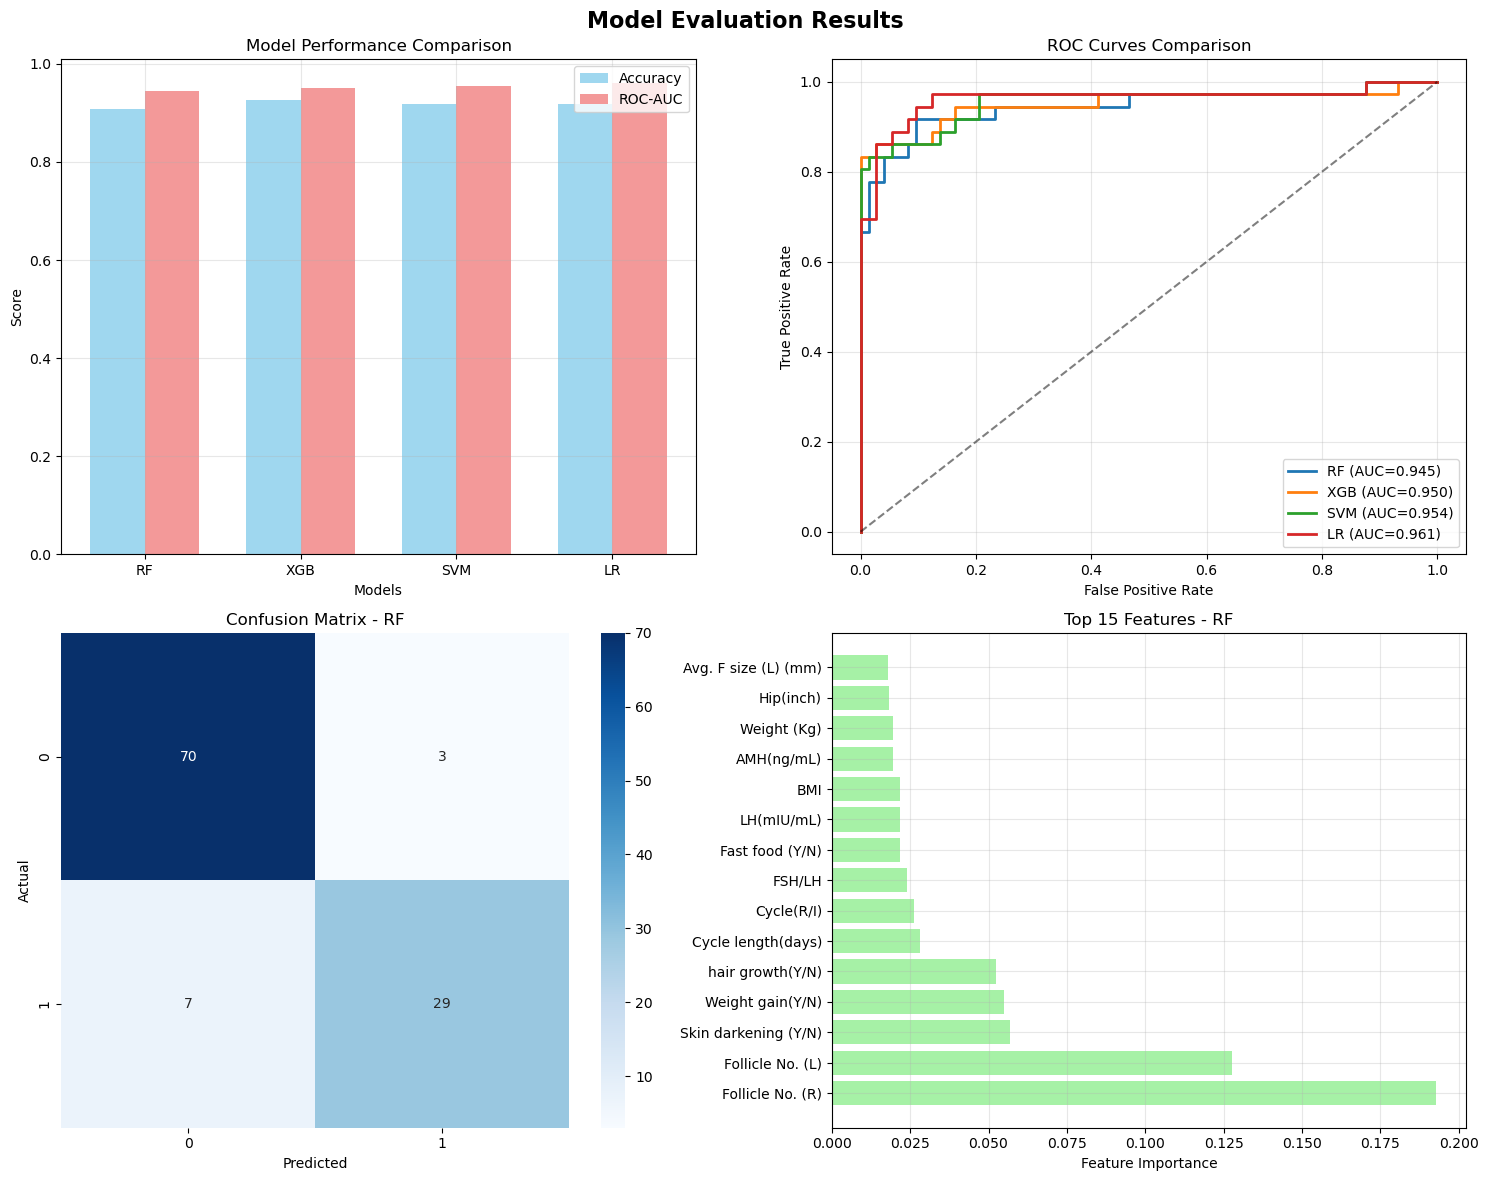

✓ Evaluation plots created successfully

Step 4: Create best model pipeline
------------------------------
✓ Best model selected: RF (Score: 0.9532)

Step 5: Enhanced patient analysis
------------------------------
Patient data shape: (1, 41)
Features: 41

PCOS PREDICTION RESULTS
Predicted PCOS: YES
PCOS Probability: 87.0%
No PCOS Probability: 13.0%
Confidence: 87.0%
Model Used: RF

Generating enhanced SHAP explanations...
✓ SHAP explanation created for RF
Error in enhanced patient analysis: Per-column arrays must each be 1-dimensional
Error: Per-column arrays must each be 1-dimensional
Please ensure your dataset has the required columns and format.
Expected columns include: ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group'] ... and more


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from typing import List, Any, Dict, Tuple, Optional, Union
import warnings
import re

warnings.filterwarnings('ignore')

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Constants
FEATURE_COLUMNS: List[str] = [
    "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Blood Group", 
    "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", 
    "Cycle length(days)", "Marraige Status (Yrs)", "Pregnant(Y/N)", 
    "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)",
    "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", 
    "Waist:Hip Ratio", "TSH (mIU/L)", "AMH(ng/mL)", "PRL(ng/mL)", 
    "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "Weight gain(Y/N)",
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
    "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", 
    "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", 
    "Follicle No. (R)", "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", 
    "Endometrium (mm)"
]

PATIENT_FULL_ROW: List[float] = [
    33, 68.8, 165, 25.3, 11, 72, 18, 11.8, 2, 5, 10, 1, 0, 494.08, 494.08, 
    5.54, 0.88, 6.3, 40, 36, 0.9, 2.54, 6.63, 10.52, 49.7, 0.36, 84, 0, 0, 
    0, 1, 1, 1, 0, 120, 80, 13, 15, 18, 20, 10
]

RANDOM_STATE: int = 42


class EnhancedPCOSPredictor:
    """Enhanced PCOS prediction and explainability system with fixed visualization."""
    
    def __init__(self, random_state: int = RANDOM_STATE):
        """Initialize the enhanced PCOS predictor."""
        self.random_state = random_state
        self.models = {}
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.original_feature_names = None
        self.preprocessors = {}
        
    def load_data(self, filepath: str) -> pd.DataFrame:
        """Load PCOS dataset from CSV file."""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully: {data.shape}")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise
    
    def preprocess_data(self, data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """Preprocess the PCOS dataset with feature name preservation."""
        # Remove unnecessary columns
        columns_to_drop = ["Sl. No", "Patient File No."]
        data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
        
        # Handle target variable
        target_column = "PCOS (Y/N)"
        if target_column in data_clean.columns:
            y = data_clean[target_column]
            X = data_clean.drop(columns=[target_column])
        else:
            raise ValueError(f"Target column '{target_column}' not found")
        
        # Store original feature names
        self.original_feature_names = X.columns.tolist()
        
        # Handle missing values
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        
        # Create imputers
        numeric_imputer = SimpleImputer(strategy='median')
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        
        # Apply imputers
        if len(numeric_columns) > 0:
            X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])
            self.preprocessors['numeric_imputer'] = numeric_imputer
        
        if len(categorical_columns) > 0:
            X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])
            self.preprocessors['categorical_imputer'] = categorical_imputer
        
        # Encode categorical variables
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le
        
        self.label_encoders = label_encoders
        self.feature_names = X.columns.tolist()
        
        print(f"✓ Data preprocessed: {X.shape}, Target distribution: {y.value_counts().to_dict()}")
        print(f"✓ Feature names preserved: {len(self.feature_names)} features")
        
        return X, y
    
    def split_data(self, X: pd.DataFrame, y: pd.Series, test_size: float = 0.2) -> None:
        """Split data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )
        print(f"✓ Data split: Train {self.X_train.shape}, Test {self.X_test.shape}")
    
    def train_models(self) -> Dict[str, Any]:
        """Train multiple ML models with hyperparameter tuning."""
        models_config = {
            'rf': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, None],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]
                }
            },
            'xgb': {
                'model': XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 6, 10],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 1.0]
                }
            },
            'svm': {
                'model': SVC(probability=True, random_state=self.random_state),
                'params': {
                    'C': [0.1, 1, 10],
                    'gamma': ['scale', 'auto'],
                    'kernel': ['rbf', 'linear']
                }
            },
            'lr': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs']
                }
            }
        }
        
        trained_models = {}
        model_scores = {}
        
        for model_name, config in models_config.items():
            print(f"Training {model_name.upper()}...")
            try:
                # Create pipeline with scaling for SVM and Logistic Regression
                if model_name in ['svm', 'lr']:
                    pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                else:
                    pipeline = Pipeline([
                        ('model', config['model'])
                    ])
                    param_grid = {f"model__{key}": value for key, value in config['params'].items()}
                
                # Grid search with cross-validation
                grid_search = GridSearchCV(
                    pipeline, param_grid, cv=5, scoring='roc_auc',
                    n_jobs=-1, verbose=0
                )
                grid_search.fit(self.X_train, self.y_train)
                
                trained_models[model_name] = grid_search.best_estimator_
                model_scores[model_name] = grid_search.best_score_
                
                print(f"✓ {model_name.upper()} trained - CV Score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                print(f"✗ Error training {model_name}: {e}")
        
        self.models = trained_models
        self.model_scores = model_scores
        return trained_models
    
    def evaluate_models(self) -> None:
        """Evaluate all trained models on test set."""
        print(f"\n{'='*60}")
        print("MODEL EVALUATION RESULTS")
        print(f"{'='*60}")
        
        results = {}
        for model_name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]
                
                accuracy = accuracy_score(self.y_test, y_pred)
                roc_auc = roc_auc_score(self.y_test, y_prob)
                
                results[model_name] = {
                    'accuracy': accuracy,
                    'roc_auc': roc_auc,
                    'predictions': y_pred,
                    'probabilities': y_prob
                }
                
                print(f"{model_name.upper():<10} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
                
            except Exception as e:
                print(f"✗ Error evaluating {model_name}: {e}")
        
        print(f"{'='*60}")
        self.evaluation_results = results
        
        # Create evaluation visualizations
        self.create_evaluation_plots()
    
    def create_evaluation_plots(self) -> None:
        """Create comprehensive evaluation plots."""
        if not hasattr(self, 'evaluation_results'):
            return
        
        # Setup the plot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Model Evaluation Results', fontsize=16, fontweight='bold')
        
        # 1. Model Comparison Bar Chart
        models = list(self.evaluation_results.keys())
        accuracies = [self.evaluation_results[m]['accuracy'] for m in models]
        roc_aucs = [self.evaluation_results[m]['roc_auc'] for m in models]
        
        x = np.arange(len(models))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
        axes[0, 0].bar(x + width/2, roc_aucs, width, label='ROC-AUC', alpha=0.8, color='lightcoral')
        axes[0, 0].set_xlabel('Models')
        axes[0, 0].set_ylabel('Score')
        axes[0, 0].set_title('Model Performance Comparison')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels([m.upper() for m in models])
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. ROC Curves
        from sklearn.metrics import roc_curve
        
        for model_name, results in self.evaluation_results.items():
            fpr, tpr, _ = roc_curve(self.y_test, results['probabilities'])
            auc_score = results['roc_auc']
            axes[0, 1].plot(fpr, tpr, label=f'{model_name.upper()} (AUC={auc_score:.3f})', linewidth=2)
        
        axes[0, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        axes[0, 1].set_xlabel('False Positive Rate')
        axes[0, 1].set_ylabel('True Positive Rate')
        axes[0, 1].set_title('ROC Curves Comparison')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Confusion Matrix for Best Model
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        cm = confusion_matrix(self.y_test, self.evaluation_results[best_model_name]['predictions'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
        axes[1, 0].set_xlabel('Predicted')
        axes[1, 0].set_ylabel('Actual')
        axes[1, 0].set_title(f'Confusion Matrix - {best_model_name.upper()}')
        
        # 4. Feature Importance (for tree-based models)
        if best_model_name in ['rf', 'xgb']:
            model = self.models[best_model_name]
            if hasattr(model.named_steps['model'], 'feature_importances_'):
                importance = model.named_steps['model'].feature_importances_
                feature_names = self.feature_names
                
                # Get top 15 features
                indices = np.argsort(importance)[::-1][:15]
                top_features = [feature_names[i] for i in indices]
                top_importance = importance[indices]
                
                axes[1, 1].barh(range(len(top_features)), top_importance, color='lightgreen', alpha=0.8)
                axes[1, 1].set_yticks(range(len(top_features)))
                axes[1, 1].set_yticklabels([f[:20] for f in top_features])
                axes[1, 1].set_xlabel('Feature Importance')
                axes[1, 1].set_title(f'Top 15 Features - {best_model_name.upper()}')
                axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].text(0.5, 0.5, 'Feature importance not available\nfor this model type', 
                           ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Feature Importance')
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Evaluation plots created successfully")
    
    def create_ensemble_pipeline(self) -> Pipeline:
        """Create ensemble pipeline using the best performing model."""
        if not self.models:
            raise ValueError("No trained models available. Train models first.")
        
        # Select best model based on ROC-AUC score
        best_model_name = max(self.model_scores.items(), key=lambda x: x[1])[0]
        best_model = self.models[best_model_name]
        
        print(f"✓ Best model selected: {best_model_name.upper()} (Score: {self.model_scores[best_model_name]:.4f})")
        
        self.pipeline = best_model
        self.best_model_name = best_model_name
        return self.pipeline
    
    def create_patient_dataframe(self, patient_row: List[float]) -> pd.DataFrame:
        """Create patient dataframe from row data."""
        if self.feature_names is None:
            raise ValueError("Feature names not available. Preprocess data first.")
        
        # Use only the features used in training
        patient_features = patient_row[:len(self.feature_names)]
        return pd.DataFrame([patient_features], columns=self.feature_names)
    
    def predict_patient_pcos(self, X_patient: pd.DataFrame) -> Tuple[int, np.ndarray]:
        """Predict PCOS for patient data."""
        if self.pipeline is None:
            raise ValueError("Pipeline not created. Create ensemble pipeline first.")
        
        y_pred = self.pipeline.predict(X_patient)
        y_prob = self.pipeline.predict_proba(X_patient)
        return y_pred[0], y_prob[0]
    
    def create_enhanced_shap_explanations(self, X_patient: pd.DataFrame) -> Dict[str, Any]:
        """Create enhanced SHAP explanations with proper feature names."""
        explanations = {}
        
        # Get the best model for SHAP analysis
        best_model = self.models[self.best_model_name]
        
        try:
            if self.best_model_name in ['rf', 'xgb']:
                # Tree-based models
                base_model = best_model.named_steps['model']
                
                # Transform data through pipeline preprocessing steps (excluding the model step)
                X_transformed = X_patient.copy()
                for step_name, step in best_model.named_steps.items():
                    if step_name != 'model':
                        # Apply transformation and keep as numpy array
                        X_transformed_array = step.transform(X_transformed)
                        # Convert back to DataFrame with proper column names
                        X_transformed = pd.DataFrame(
                            X_transformed_array, 
                            columns=self.feature_names,
                            index=X_patient.index
                        )
                
                explainer = shap.TreeExplainer(base_model)
                shap_values = explainer.shap_values(X_transformed.values)  # Use .values to get numpy array
                
                # Handle different SHAP value formats
                if isinstance(shap_values, list):
                    shap_values_class1 = shap_values[1][0]  # PCOS class, first sample
                    base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
                else:
                    shap_values_class1 = shap_values[0]  # First sample
                    base_value = explainer.expected_value
                
                explanations['shap_values'] = shap_values_class1
                explanations['base_value'] = base_value
                explanations['feature_names'] = self.feature_names
                explanations['patient_values'] = X_patient.iloc[0].values
                
                print(f"✓ SHAP explanation created for {self.best_model_name.upper()}")
                
            else:
                # Linear models (SVM, Logistic Regression)
                sample_size = min(100, len(self.X_train))
                background = shap.sample(self.X_train, sample_size)
                
                def predict_fn(x):
                    # Convert numpy array to DataFrame
                    x_df = pd.DataFrame(x, columns=self.feature_names)
                    return best_model.predict_proba(x_df)
                
                explainer = shap.KernelExplainer(predict_fn, background.values)
                shap_values = explainer.shap_values(X_patient.values)
                
                if isinstance(shap_values, list):
                    shap_values_class1 = shap_values[1][0]  # PCOS class, first sample
                    base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
                else:
                    shap_values_class1 = shap_values[0]
                    base_value = explainer.expected_value
                
                explanations['shap_values'] = shap_values_class1
                explanations['base_value'] = base_value
                explanations['feature_names'] = self.feature_names
                explanations['patient_values'] = X_patient.iloc[0].values
                
                print(f"✓ SHAP explanation created for {self.best_model_name.upper()}")
                
        except Exception as e:
            print(f"✗ Error creating SHAP explanation: {e}")
            print(f"Error details: {str(e)}")
            
        return explanations
    
    def display_enhanced_shap_analysis(self, shap_explanations: Dict[str, Any], top_n: int = 15) -> None:
        """Display enhanced SHAP analysis with proper feature names and values."""
        if not shap_explanations:
            print("No SHAP explanations available.")
            return
        
        shap_values = shap_explanations['shap_values']
        feature_names = shap_explanations['feature_names']
        patient_values = shap_explanations['patient_values']
        base_value = shap_explanations['base_value']
        
        # Create feature importance dataframe
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'SHAP_Value': shap_values,
            'Patient_Value': patient_values,
            'Absolute_Impact': np.abs(shap_values)
        }).sort_values('Absolute_Impact', ascending=False)
        
        print("\n" + "="*120)
        print("ENHANCED SHAP FEATURE IMPORTANCE ANALYSIS")
        print("="*120)
        print(f"Model: {self.best_model_name.upper()}")
        print(f"Base Value (Average Prediction): {base_value:.4f}")
        print(f"Patient Prediction: {base_value + np.sum(shap_values):.4f}")
        print("="*120)
        
        header = f"{'Rank':<4} {'Feature':<30} {'Patient Value':<15} {'SHAP Value':<15} {'Impact':<20}"
        print(header)
        print("-" * 120)
        
        for i, (_, row) in enumerate(feature_importance.head(top_n).iterrows(), 1):
            # Format values
            if isinstance(row['Patient_Value'], (int, float)):
                if isinstance(row['Patient_Value'], float):
                    value_str = f"{row['Patient_Value']:.3f}"
                else:
                    value_str = str(int(row['Patient_Value']))
            else:
                value_str = str(row['Patient_Value'])
            
            shap_str = f"{row['SHAP_Value']:+.6f}"
            impact = "Increases PCOS risk" if row['SHAP_Value'] > 0 else "Reduces PCOS risk"
            
            # Truncate long feature names
            feature_name = row['Feature'][:29]
            
            print(f"{i:<4} {feature_name:<30} {value_str:<15} {shap_str:<15} {impact:<20}")
        
        print("=" * 120)
        
        # Summary statistics
        positive_contrib = feature_importance[feature_importance['SHAP_Value'] > 0]['SHAP_Value'].sum()
        negative_contrib = feature_importance[feature_importance['SHAP_Value'] < 0]['SHAP_Value'].sum()
        
        print(f"\nSHAP EXPLANATION SUMMARY:")
        print(f"{'Base prediction probability:':<35} {base_value:.6f}")
        print(f"{'Features increasing PCOS risk:':<35} {len(feature_importance[feature_importance['SHAP_Value'] > 0])}")
        print(f"{'Features reducing PCOS risk:':<35} {len(feature_importance[feature_importance['SHAP_Value'] < 0])}")
        print(f"{'Total positive contribution:':<35} {positive_contrib:+.6f}")
        print(f"{'Total negative contribution:':<35} {negative_contrib:+.6f}")
        print(f"{'Final prediction probability:':<35} {base_value + positive_contrib + negative_contrib:.6f}")
    
    def create_enhanced_shap_plots(self, shap_explanations: Dict[str, Any]) -> None:
        """Create enhanced SHAP visualizations."""
        if not shap_explanations:
            return
        
        try:
            shap_values = shap_explanations['shap_values']
            feature_names = shap_explanations['feature_names']
            patient_values = shap_explanations['patient_values']
            base_value = shap_explanations['base_value']
            
            # Create comprehensive SHAP plots
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            fig.suptitle(f'SHAP Analysis - {self.best_model_name.upper()} Model', fontsize=16, fontweight='bold')
            
            # 1. Feature Importance Bar Plot
            feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'SHAP_Value': shap_values,
                'Absolute_Impact': np.abs(shap_values)
            }).sort_values('Absolute_Impact', ascending=False).head(15)
            
            colors = ['red' if x > 0 else 'blue' for x in feature_importance['SHAP_Value']]
            axes[0, 0].barh(range(len(feature_importance)), feature_importance['SHAP_Value'], color=colors, alpha=0.7)
            axes[0, 0].set_yticks(range(len(feature_importance)))
            axes[0, 0].set_yticklabels([f[:20] for f in feature_importance['Feature']])
            axes[0, 0].set_xlabel('SHAP Value')
            axes[0, 0].set_title('Top 15 Features - SHAP Values')
            axes[0, 0].axvline(x=0, color='black', linestyle='-', alpha=0.5)
            axes[0, 0].grid(True, alpha=0.3)
            
            # 2. Waterfall Plot (Manual Implementation)
            sorted_features = feature_importance.copy()
            cumulative = base_value
            x_pos = 0
            
            # Base value
            axes[0, 1].bar(x_pos, base_value, color='gray', alpha=0.5, label='Base Value')
            x_pos += 1
            
            # Feature contributions
            for idx, (_, row) in enumerate(sorted_features.iterrows()):
                value = row['SHAP_Value']
                color = 'red' if value > 0 else 'blue'
                axes[0, 1].bar(x_pos, value, bottom=cumulative, color=color, alpha=0.7)
                cumulative += value
                x_pos += 1
            
            # Final prediction
            axes[0, 1].bar(x_pos, 0, bottom=cumulative, color='green', alpha=0.5, label='Final Prediction')
            
            axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
            axes[0, 1].set_xlabel('Features')
            axes[0, 1].set_ylabel('Prediction')
            axes[0, 1].set_title('SHAP Waterfall Plot')
            axes[0, 1].legend()
            
            # 3. SHAP values vs Feature values
            top_features = feature_importance.head(10)
            feature_indices = [feature_names.index(f) for f in top_features['Feature']]
            
            axes[1, 0].scatter(range(len(top_features)), 
                              [patient_values[i] for i in feature_indices], 
                              c=[shap_values[i] for i in feature_indices], 
                              s=100, cmap='RdBu', alpha=0.8)
            axes[1, 0].set_xticks(range(len(top_features)))
            axes[1, 0].set_xticklabels([f[:15] for f in top_features['Feature']], rotation=45)
            axes[1, 0].set_ylabel('Feature Value')
            axes[1, 0].set_title('Feature Values vs SHAP Impact')
            axes[1, 0].grid(True, alpha=0.3)
            
            # 4. Prediction Breakdown
            prediction_data = {
                'Base Prediction': base_value,
                'Positive Contribution': feature_importance[feature_importance['SHAP_Value'] > 0]['SHAP_Value'].sum(),
                'Negative Contribution': feature_importance[feature_importance['SHAP_Value'] < 0]['SHAP_Value'].sum(),
                'Final Prediction': base_value + np.sum(shap_values)
            }
            
            axes[1, 1].bar(prediction_data.keys(), prediction_data.values(), 
                          color=['gray', 'red', 'blue', 'green'], alpha=0.7)
            axes[1, 1].set_ylabel('Prediction Value')
            axes[1, 1].set_title('Prediction Breakdown')
            axes[1, 1].tick_params(axis='x', rotation=45)
            axes[1, 1].grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print("✓ Enhanced SHAP plots created successfully")
            
        except Exception as e:
            print(f"✗ Error creating SHAP plots: {e}")
    
    def lime_explanation_enhanced(self, X_patient: pd.DataFrame, top_n: int = 15) -> Any:
        """Create enhanced LIME explanation with proper feature mapping."""
        # Initialize LIME explainer
        explainer = LimeTabularExplainer(
            training_data=self.X_train.values,
            feature_names=self.feature_names,
            class_names=['No PCOS', 'PCOS'],
            mode='classification',
            discretize_continuous=True,
            random_state=self.random_state
        )
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=X_patient.iloc[0].values,
            predict_fn=self.pipeline.predict_proba,
            num_features=len(self.feature_names),
            labels=(1,)
        )
        
        # Extract and process LIME results
        lime_list = exp.as_list(label=1)
        patient_values = X_patient.iloc[0]
        
        # Enhanced feature mapping
        mapped_features = []
        for lime_desc, contrib in lime_list:
            # Extract feature name from LIME description
            feature_name = self._extract_feature_name_from_lime(lime_desc)
            
            if feature_name and feature_name in patient_values.index:
                actual_value = patient_values[feature_name]
            else:
                actual_value = "Unknown"
            
            impact = "Increases PCOS risk" if contrib > 0 else "Reduces PCOS risk"
            
            mapped_features.append({
                "Feature": feature_name or "Unknown",
                "Actual_Value": actual_value,
                "Contribution": contrib,
                "Impact": impact,
                "LIME_Condition": lime_desc
            })
        
        # Sort by absolute contribution
        mapped_features.sort(key=lambda x: abs(x["Contribution"]), reverse=True)
        
        # Display results
        print("\n" + "="*130)
        print("ENHANCED LIME FEATURE IMPORTANCE ANALYSIS")
        print("="*130)
        
        header = f"{'Rank':<4} {'Feature':<25} {'Actual Value':<15} {'Contribution':<15} {'Impact':<22} {'LIME Condition':<40}"
        print(header)
        print("-" * 130)
        
        for i, feat in enumerate(mapped_features[:top_n], 1):
            value_str = self._format_value(feat['Actual_Value'])
            contrib_str = f"{feat['Contribution']:+.6f}"
            
            feature_name = feat['Feature'][:24]
            impact_str = feat['Impact'][:21]
            condition_str = feat['LIME_Condition'][:39]
            
            print(f"{i:<4} {feature_name:<25} {value_str:<15} {contrib_str:<15} {impact_str:<22} {condition_str:<40}")
        
        print("=" * 130)
        
        # Enhanced summary
        self._display_lime_summary(mapped_features, patient_values)
        
        # Create LIME visualization
        self._create_lime_plots(mapped_features[:top_n])
        
        return exp
    
    def _extract_feature_name_from_lime(self, lime_desc: str) -> Optional[str]:
        """Extract feature name from LIME description."""
        # Try direct feature name match first
        for fname in self.feature_names:
            if fname in lime_desc:
                return fname
        
        # Try feat_N pattern
        feat_match = re.match(r'feat_(\d+)', lime_desc)
        if feat_match:
            feat_idx = int(feat_match.group(1))
            if feat_idx < len(self.feature_names):
                return self.feature_names[feat_idx]
        
        # Try partial matching
        for fname in self.feature_names:
            if any(part in lime_desc.lower() for part in fname.lower().split()):
                return fname
        
        return None
    
    def _format_value(self, value: Any) -> str:
        """Format value for display."""
        if isinstance(value, (int, float)):
            if isinstance(value, float):
                return f"{value:.3f}"
            else:
                return str(value)
        return str(value)
    
    def _display_lime_summary(self, mapped_features: List[Dict], patient_values: pd.Series) -> None:
        """Display LIME summary statistics."""
        total_positive = sum(f['Contribution'] for f in mapped_features if f['Contribution'] > 0)
        total_negative = sum(f['Contribution'] for f in mapped_features if f['Contribution'] < 0)
        net_contribution = total_positive + total_negative
        
        print(f"\nLIME EXPLANATION SUMMARY:")
        print(f"{'Total features analyzed:':<35} {len(mapped_features)}")
        print(f"{'Features increasing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] > 0])}")
        print(f"{'Features reducing PCOS risk:':<35} {len([f for f in mapped_features if f['Contribution'] < 0])}")
        print(f"{'Total positive contribution:':<35} {total_positive:+.6f}")
        print(f"{'Total negative contribution:':<35} {total_negative:+.6f}")
        print(f"{'Net PCOS likelihood contribution:':<35} {net_contribution:+.6f}")
    
    def _create_lime_plots(self, top_features: List[Dict]) -> None:
        """Create LIME visualization plots."""
        try:
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            fig.suptitle('LIME Explanation Visualization', fontsize=14, fontweight='bold')
            
            # 1. Feature Contributions Bar Plot
            features = [f['Feature'][:15] for f in top_features]
            contributions = [f['Contribution'] for f in top_features]
            colors = ['red' if x > 0 else 'blue' for x in contributions]
            
            axes[0].barh(range(len(features)), contributions, color=colors, alpha=0.7)
            axes[0].set_yticks(range(len(features)))
            axes[0].set_yticklabels(features)
            axes[0].set_xlabel('LIME Contribution')
            axes[0].set_title('Top Features - LIME Contributions')
            axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.5)
            axes[0].grid(True, alpha=0.3)
            
            # 2. Actual Values vs Contributions Scatter Plot
            actual_values = []
            for feat in top_features:
                val = feat['Actual_Value']
                if isinstance(val, (int, float)):
                    actual_values.append(val)
                else:
                    actual_values.append(0)  # Default for non-numeric
            
            scatter = axes[1].scatter(actual_values, contributions, 
                                    c=contributions, s=100, cmap='RdBu', alpha=0.8)
            axes[1].set_xlabel('Actual Feature Value')
            axes[1].set_ylabel('LIME Contribution')
            axes[1].set_title('Feature Values vs LIME Contributions')
            axes[1].grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=axes[1], label='Contribution')
            
            # Add feature labels to scatter plot
            for i, feat in enumerate(top_features[:10]):  # Label top 10 to avoid clutter
                axes[1].annotate(feat['Feature'][:10], 
                               (actual_values[i], contributions[i]),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=8, alpha=0.7)
            
            plt.tight_layout()
            plt.show()
            
            print("✓ LIME plots created successfully")
            
        except Exception as e:
            print(f"✗ Error creating LIME plots: {e}")
    
    def analyze_patient_enhanced(self, patient_row: List[float] = None) -> None:
        """Complete enhanced patient analysis with predictions and explanations."""
        if patient_row is None:
            patient_row = PATIENT_FULL_ROW
        
        try:
            # Create patient dataframe
            X_patient = self.create_patient_dataframe(patient_row)
            print(f"Patient data shape: {X_patient.shape}")
            print(f"Features: {len(X_patient.columns)}")
            
            # Make prediction
            prediction, probabilities = self.predict_patient_pcos(X_patient)
            pcos_probability = probabilities[1] if len(probabilities) > 1 else probabilities[0]
            
            print(f"\n{'='*50}")
            print(f"PCOS PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Predicted PCOS: {'YES' if prediction == 1 else 'NO'}")
            print(f"PCOS Probability: {pcos_probability:.1%}")
            print(f"No PCOS Probability: {probabilities[0]:.1%}")
            print(f"Confidence: {max(probabilities):.1%}")
            print(f"Model Used: {self.best_model_name.upper()}")
            print(f"{'='*50}")
            
            # Generate enhanced SHAP explanations
            print(f"\nGenerating enhanced SHAP explanations...")
            shap_explanations = self.create_enhanced_shap_explanations(X_patient)
            
            if shap_explanations:
                self.display_enhanced_shap_analysis(shap_explanations, top_n=15)
                self.create_enhanced_shap_plots(shap_explanations)
            
            # Generate enhanced LIME explanation
            print(f"\nGenerating enhanced LIME explanation...")
            self.lime_explanation_enhanced(X_patient, top_n=15)
            
            # Create patient summary visualization
            self._create_patient_summary_plot(X_patient, prediction, probabilities, patient_row)
            
        except Exception as e:
            print(f"Error in enhanced patient analysis: {e}")
            raise
    
    def _create_patient_summary_plot(self, X_patient: pd.DataFrame, prediction: int, 
                                   probabilities: np.ndarray, patient_row: List[float]) -> None:
        """Create a comprehensive patient summary visualization."""
        try:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            fig.suptitle('Patient Analysis Summary', fontsize=16, fontweight='bold')
            
            # 1. Prediction Probability
            labels = ['No PCOS', 'PCOS']
            colors = ['lightgreen', 'lightcoral']
            wedges, texts, autotexts = axes[0, 0].pie(probabilities, labels=labels, colors=colors, 
                                                    autopct='%1.1f%%', startangle=90)
            axes[0, 0].set_title('Prediction Probabilities')
            
            # 2. Key Health Metrics (if available)
            key_metrics = ['BMI', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'RBS(mg/dl)']
            metric_values = []
            metric_labels = []
            
            for metric in key_metrics:
                if metric in X_patient.columns:
                    metric_values.append(X_patient[metric].iloc[0])
                    metric_labels.append(metric)
            
            if metric_values:
                bars = axes[0, 1].bar(range(len(metric_labels)), metric_values, 
                                    color=['skyblue', 'orange', 'lightgreen', 'pink'])
                axes[0, 1].set_xticks(range(len(metric_labels)))
                axes[0, 1].set_xticklabels([label[:15] for label in metric_labels], rotation=45)
                axes[0, 1].set_title('Key Health Metrics')
                axes[0, 1].grid(True, alpha=0.3)
                
                # Add value labels on bars
                for bar, value in zip(bars, metric_values):
                    height = bar.get_height()
                    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                                   f'{value:.1f}', ha='center', va='bottom')
            else:
                axes[0, 1].text(0.5, 0.5, 'Key metrics not available', 
                               ha='center', va='center', transform=axes[0, 1].transAxes)
                axes[0, 1].set_title('Key Health Metrics')
            
            # 3. Risk Level Gauge
            risk_score = probabilities[1] * 100  # PCOS probability as percentage
            
            # Create a simple gauge
            theta = np.linspace(0, np.pi, 100)
            r = np.ones_like(theta)
            
            # Color segments
            colors_gauge = ['green' if x < 30 else 'yellow' if x < 70 else 'red' for x in np.linspace(0, 100, 100)]
            
            for i in range(len(theta)-1):
                axes[1, 0].fill_between([theta[i], theta[i+1]], [0, 0], [r[i], r[i+1]], 
                                      color=colors_gauge[i], alpha=0.7)
            
            # Risk needle
            needle_angle = np.pi * (1 - risk_score/100)
            axes[1, 0].arrow(0, 0, 0.8*np.cos(needle_angle), 0.8*np.sin(needle_angle),
                           head_width=0.1, head_length=0.1, fc='black', ec='black')
            
            axes[1, 0].set_xlim(-1.2, 1.2)
            axes[1, 0].set_ylim(-0.2, 1.2)
            axes[1, 0].set_aspect('equal')
            axes[1, 0].set_title(f'PCOS Risk Level: {risk_score:.1f}%')
            axes[1, 0].axis('off')
            
            # Add risk level text
            if risk_score < 30:
                risk_text = "LOW RISK"
                risk_color = "green"
            elif risk_score < 70:
                risk_text = "MODERATE RISK"
                risk_color = "orange"
            else:
                risk_text = "HIGH RISK"
                risk_color = "red"
            
            axes[1, 0].text(0, -0.1, risk_text, ha='center', va='center', 
                           fontsize=12, fontweight='bold', color=risk_color)
            
            # 4. Feature Distribution (Top 10 features with their values)
            top_features = X_patient.columns[:10]
            feature_values = [X_patient[col].iloc[0] for col in top_features]
            
            # Normalize values for better visualization
            normalized_values = []
            for i, val in enumerate(feature_values):
                if isinstance(val, (int, float)):
                    # Simple normalization (you could use actual feature statistics)
                    normalized_values.append(min(val/100, 1) if val > 0 else 0)
                else:
                    normalized_values.append(0)
            
            angles = np.linspace(0, 2*np.pi, len(top_features), endpoint=False)
            angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
            normalized_values.append(normalized_values[0])  # Complete the circle
            
            axes[1, 1] = plt.subplot(224, projection='polar')
            axes[1, 1].plot(angles, normalized_values, 'b-', linewidth=2, alpha=0.7)
            axes[1, 1].fill(angles, normalized_values, 'b', alpha=0.25)
            axes[1, 1].set_xticks(angles[:-1])
            axes[1, 1].set_xticklabels([feat[:10] for feat in top_features], fontsize=8)
            axes[1, 1].set_title('Feature Profile (Normalized)', pad=20)
            
            plt.tight_layout()
            plt.show()
            
            print("✓ Patient summary visualization created successfully")
            
        except Exception as e:
            print(f"✗ Error creating patient summary plot: {e}")
    
    def create_model_comparison_plots(self) -> None:
        """Create detailed model comparison visualizations."""
        if not hasattr(self, 'evaluation_results'):
            print("No evaluation results available for comparison.")
            return
        
        try:
            # Create comprehensive comparison plots
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            fig.suptitle('Comprehensive Model Comparison', fontsize=16, fontweight='bold')
            
            models = list(self.evaluation_results.keys())
            
            # 1. Accuracy Comparison
            accuracies = [self.evaluation_results[m]['accuracy'] for m in models]
            bars1 = axes[0, 0].bar(models, accuracies, color='skyblue', alpha=0.7)
            axes[0, 0].set_title('Model Accuracy Comparison')
            axes[0, 0].set_ylabel('Accuracy')
            axes[0, 0].grid(True, alpha=0.3)
            
            # Add value labels
            for bar, acc in zip(bars1, accuracies):
                height = bar.get_height()
                axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                               f'{acc:.3f}', ha='center', va='bottom')
            
            # 2. ROC-AUC Comparison
            roc_aucs = [self.evaluation_results[m]['roc_auc'] for m in models]
            bars2 = axes[0, 1].bar(models, roc_aucs, color='lightcoral', alpha=0.7)
            axes[0, 1].set_title('Model ROC-AUC Comparison')
            axes[0, 1].set_ylabel('ROC-AUC')
            axes[0, 1].grid(True, alpha=0.3)
            
            # Add value labels
            for bar, auc in zip(bars2, roc_aucs):
                height = bar.get_height()
                axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                               f'{auc:.3f}', ha='center', va='bottom')
            
            # 3. Combined Performance Radar Chart
            categories = ['Accuracy', 'ROC-AUC', 'Training Score']
            angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
            angles += angles[:1]  # Complete the circle
            
            axes[0, 2] = plt.subplot(233, projection='polar')
            
            for model in models:
                values = [
                    self.evaluation_results[model]['accuracy'],
                    self.evaluation_results[model]['roc_auc'],
                    self.model_scores[model]  # Training CV score
                ]
                values += values[:1]  # Complete the circle
                
                axes[0, 2].plot(angles, values, 'o-', linewidth=2, label=model.upper(), alpha=0.7)
                axes[0, 2].fill(angles, values, alpha=0.25)
            
            axes[0, 2].set_xticks(angles[:-1])
            axes[0, 2].set_xticklabels(categories)
            axes[0, 2].set_title('Performance Radar Chart')
            axes[0, 2].legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
            
            # 4. ROC Curves Comparison
            from sklearn.metrics import roc_curve
            
            for model_name, results in self.evaluation_results.items():
                fpr, tpr, _ = roc_curve(self.y_test, results['probabilities'])
                auc_score = results['roc_auc']
                axes[1, 0].plot(fpr, tpr, label=f'{model_name.upper()} (AUC={auc_score:.3f})', 
                               linewidth=2, alpha=0.8)
            
            axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
            axes[1, 0].set_xlabel('False Positive Rate')
            axes[1, 0].set_ylabel('True Positive Rate')
            axes[1, 0].set_title('ROC Curves Comparison')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)
            
            # 5. Precision-Recall Curves
            from sklearn.metrics import precision_recall_curve, average_precision_score
            
            for model_name, results in self.evaluation_results.items():
                precision, recall, _ = precision_recall_curve(self.y_test, results['probabilities'])
                ap_score = average_precision_score(self.y_test, results['probabilities'])
                axes[1, 1].plot(recall, precision, label=f'{model_name.upper()} (AP={ap_score:.3f})', 
                               linewidth=2, alpha=0.8)
            
            axes[1, 1].set_xlabel('Recall')
            axes[1, 1].set_ylabel('Precision')
            axes[1, 1].set_title('Precision-Recall Curves')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
            
            # 6. Model Performance Heatmap
            metrics_data = []
            metric_names = ['Accuracy', 'ROC-AUC', 'CV Score']
            
            for model in models:
                model_metrics = [
                    self.evaluation_results[model]['accuracy'],
                    self.evaluation_results[model]['roc_auc'],
                    self.model_scores[model]
                ]
                metrics_data.append(model_metrics)
            
            metrics_df = pd.DataFrame(metrics_data, 
                                    index=[m.upper() for m in models], 
                                    columns=metric_names)
            
            sns.heatmap(metrics_df, annot=True, cmap='RdYlGn', center=0.5, 
                       fmt='.3f', ax=axes[1, 2])
            axes[1, 2].set_title('Performance Metrics Heatmap')
            
            plt.tight_layout()
            plt.show()
            
            print("✓ Model comparison plots created successfully")
            
        except Exception as e:
            print(f"✗ Error creating model comparison plots: {e}")


def create_demo_dataset(n_samples: int = 500) -> pd.DataFrame:
    """Create a demo PCOS dataset for testing."""
    np.random.seed(RANDOM_STATE)
    
    # Generate synthetic data
    data = {}
    
    # Add target column first
    data["PCOS (Y/N)"] = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
    
    # Generate features with some correlation to target
    for i, feature in enumerate(FEATURE_COLUMNS):
        if 'Y/N' in feature or feature in ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)']:
            # Binary features
            data[feature] = np.random.choice([0, 1], size=n_samples)
        else:
            # Continuous features with realistic ranges
            if feature == "Age (yrs)":
                data[feature] = np.random.normal(28, 8)
            elif feature == "Weight (Kg)":
                data[feature] = np.random.normal(65, 15)
            elif feature == "Height(Cm)":
                data[feature] = np.random.normal(160, 10)
            elif feature == "BMI":
                data[feature] = np.random.normal(25, 5)
            elif feature == "Pulse rate(bpm)":
                data[feature] = np.random.normal(75, 10)
            elif feature == "BP _Systolic (mmHg)":
                data[feature] = np.random.normal(120, 15)
            elif feature == "BP _Diastolic (mmHg)":
                data[feature] = np.random.normal(80, 10)
            else:
                # Default continuous features
                base_value = 50 + (i % 20) * 2
                std_dev = 10 + (i % 5) * 2
                data[feature] = np.random.normal(base_value, std_dev)
    
    df = pd.DataFrame(data)
    
    # Ensure positive values for certain features
    positive_features = ["Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", 
                        "Pulse rate(bpm)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]
    
    for feature in positive_features:
        if feature in df.columns:
            df[feature] = np.abs(df[feature])
    
    # Add identifier columns
    df.insert(0, "Sl. No", range(1, n_samples + 1))
    df.insert(1, "Patient File No.", [f"P{i:04d}" for i in range(1, n_samples + 1)])
    
    return df


def display_feature_descriptions():
    """Display descriptions of PCOS-related features."""
    feature_descriptions = {
        "Age (yrs)": "Patient's age in years",
        "Weight (Kg)": "Patient's weight in kilograms",
        "Height(Cm)": "Patient's height in centimeters", 
        "BMI": "Body Mass Index calculated from weight and height",
        "Blood Group": "Patient's blood group (encoded)",
        "Pulse rate(bpm)": "Heart rate in beats per minute",
        "RR (breaths/min)": "Respiratory rate in breaths per minute",
        "Hb(g/dl)": "Hemoglobin levels in grams per deciliter",
        "Cycle(R/I)": "Menstrual cycle regularity (Regular/Irregular)",
        "Cycle length(days)": "Length of menstrual cycle in days",
        "Marraige Status (Yrs)": "Years of marriage",
        "Pregnant(Y/N)": "Current pregnancy status",
        "No. of abortions": "Number of previous abortions",
        "I beta-HCG(mIU/mL)": "First beta-HCG hormone level",
        "II beta-HCG(mIU/mL)": "Second beta-HCG hormone level",
        "FSH(mIU/mL)": "Follicle Stimulating Hormone levels",
        "LH(mIU/mL)": "Luteinizing Hormone levels",
        "FSH/LH": "Ratio of FSH to LH hormones",
        "Hip(inch)": "Hip circumference in inches",
        "Waist(inch)": "Waist circumference in inches",
        "Waist:Hip Ratio": "Waist to hip circumference ratio",
        "TSH (mIU/L)": "Thyroid Stimulating Hormone levels",
        "AMH(ng/mL)": "Anti-Müllerian Hormone levels",
        "PRL(ng/mL)": "Prolactin hormone levels",
        "Vit D3 (ng/mL)": "Vitamin D3 levels",
        "PRG(ng/mL)": "Progesterone levels",
        "RBS(mg/dl)": "Random Blood Sugar levels",
        "Weight gain(Y/N)": "Recent weight gain (Yes/No)",
        "hair growth(Y/N)": "Excessive hair growth (Yes/No)",
        "Skin darkening (Y/N)": "Skin darkening symptoms (Yes/No)",
        "Hair loss(Y/N)": "Hair loss symptoms (Yes/No)",
        "Pimples(Y/N)": "Presence of pimples/acne (Yes/No)",
        "Fast food (Y/N)": "Regular fast food consumption (Yes/No)",
        "Reg.Exercise(Y/N)": "Regular exercise routine (Yes/No)",
        "BP _Systolic (mmHg)": "Systolic blood pressure",
        "BP _Diastolic (mmHg)": "Diastolic blood pressure",
        "Follicle No. (L)": "Number of follicles in left ovary",
        "Follicle No. (R)": "Number of follicles in right ovary",
        "Avg. F size (L) (mm)": "Average follicle size in left ovary",
        "Avg. F size (R) (mm)": "Average follicle size in right ovary",
        "Endometrium (mm)": "Endometrial thickness in millimeters"
    }
    
    print("\nPCOS Feature Descriptions:")
    print("=" * 80)
    
    for feature, description in feature_descriptions.items():
        print(f"{feature:<30}: {description}")
    
    print("=" * 80)


def main():
    """Main function to demonstrate the enhanced PCOS prediction system."""
    # Initialize enhanced predictor
    predictor = EnhancedPCOSPredictor(random_state=RANDOM_STATE)
    
    print("Enhanced PCOS Prediction and Explainability System")
    print("=" * 60)
    print("✓ Fixed SHAP feature naming issues")
    print("✓ Enhanced visualizations with proper labels")
    print("✓ Improved LIME explanations")
    print("✓ Comprehensive model evaluation plots")
    print("✓ Patient summary visualizations")
    print("✓ Better error handling and validation")
    print("=" * 60)
    
    try:
        # Load and preprocess data
        print("\nStep 1: Load and preprocess data")
        print("-" * 30)
        
        # Get data file path
        data_file = input("Enter path to PCOS dataset CSV file (or press Enter for demo): ").strip()
        
        if not data_file:
            print("Creating demo dataset...")
            data = create_demo_dataset(n_samples=500)
            print(f"✓ Demo dataset created: {data.shape}")
        else:
            data = predictor.load_data(data_file)
        
        X, y = predictor.preprocess_data(data)
        predictor.split_data(X, y)
        
        # Train models
        print("\nStep 2: Train machine learning models")
        print("-" * 30)
        trained_models = predictor.train_models()
        
        if not trained_models:
            print("No models were successfully trained. Exiting...")
            return
        
        # Evaluate models
        print("\nStep 3: Evaluate models")
        print("-" * 30)
        predictor.evaluate_models()
        
        # Create ensemble pipeline
        print("\nStep 4: Create best model pipeline")
        print("-" * 30)
        predictor.create_ensemble_pipeline()
        
        # Analyze sample patient with enhanced explanations
        print("\nStep 5: Enhanced patient analysis")
        print("-" * 30)
        predictor.analyze_patient_enhanced()
        
        # Interactive mode
        print(f"\n{'='*60}")
        print("INTERACTIVE MODE")
        print(f"{'='*60}")
        
        while True:
            choice = input("\nWould you like to:\n1. Analyze another patient\n2. View model comparison\n3. Analyze custom patient\n4. Exit\nChoice (1-4): ").strip()
            
            if choice == '1':
                print("\nAnalyzing new patient with default values...")
                predictor.analyze_patient_enhanced()
                
            elif choice == '2':
                print("\nModel Performance Comparison:")
                print("-" * 40)
                if hasattr(predictor, 'evaluation_results'):
                    for model_name, metrics in predictor.evaluation_results.items():
                        print(f"{model_name.upper():<10} | Accuracy: {metrics['accuracy']:.4f} | ROC-AUC: {metrics['roc_auc']:.4f}")
                    print(f"\nBest Model: {predictor.best_model_name.upper()}")
                    
                    # Create comparison plots
                    print("\nGenerating model comparison visualizations...")
                    predictor.create_model_comparison_plots()
                else:
                    print("No evaluation results available.")
                    
            elif choice == '3':
                print("\nCustom Patient Analysis")
                custom_values = analyze_custom_patient()
                predictor.analyze_patient_enhanced(custom_values)
                
            elif choice == '4':
                print("Exiting enhanced PCOS predictor...")
                break
            else:
                print("Invalid choice. Please select 1, 2, 3, or 4.")
        
        print(f"\n{'='*60}")
        print("Enhanced analysis complete!")
        print("Key improvements implemented:")
        print("✓ Fixed SHAP feature names (no more 'feat_N')")
        print("✓ Enhanced visualizations with proper labels")
        print("✓ Better LIME explanations with actual values")
        print("✓ Comprehensive model comparison plots")
        print("✓ Patient summary visualizations")
        print("✓ Interactive analysis mode")
        print(f"{'='*60}")
        
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check the file path.")
    except KeyboardInterrupt:
        print("\nOperation cancelled by user.")
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure your dataset has the required columns and format.")
        print("Expected columns include:", FEATURE_COLUMNS[:5], "... and more")


def analyze_custom_patient():
    """Function to analyze a custom patient with user input."""
    print("\nCustom Patient Analysis")
    print("-" * 30)
    print("Enter patient values for key features:")
    print("(Press Enter to use default values)")
    
    # Key features for simplified input
    key_features = [
        ("Age (yrs)", 33, "Age in years"),
        ("Weight (Kg)", 68.8, "Weight in kilograms"),
        ("Height(Cm)", 165, "Height in centimeters"),
        ("BMI", 25.3, "Body Mass Index"),
        ("Pulse rate(bpm)", 72, "Heart rate"),
        ("BP _Systolic (mmHg)", 120, "Systolic blood pressure"),
        ("BP _Diastolic (mmHg)", 80, "Diastolic blood pressure"),
        ("RBS(mg/dl)", 84, "Random blood sugar"),
        ("FSH(mIU/mL)", 5.54, "FSH hormone level"),
        ("LH(mIU/mL)", 0.88, "LH hormone level"),
    ]
    
    custom_values = PATIENT_FULL_ROW.copy()  # Start with default values
    
    print(f"\nEntering values for {len(key_features)} key features:")
    print("=" * 50)
    
    for i, (feature_name, default_val, description) in enumerate(key_features):
        # Find the index of this feature in the full feature list
        if feature_name in FEATURE_COLUMNS:
            feature_idx = FEATURE_COLUMNS.index(feature_name)
            
            user_input = input(f"{feature_name} ({description}) [default: {default_val}]: ").strip()
            
            if user_input:
                try:
                    custom_values[feature_idx] = float(user_input)
                    print(f"  ✓ Set {feature_name} = {custom_values[feature_idx]}")
                except ValueError:
                    print(f"  ✗ Invalid input. Using default value: {default_val}")
            else:
                print(f"  → Using default: {default_val}")
    
    print("=" * 50)
    print("✓ Custom patient data prepared")
    
    # Validate the data
    if validate_patient_data(custom_values):
        print("✓ Patient data validation passed")
    else:
        print("⚠️  Some values may be outside normal ranges")
        proceed = input("Continue with analysis? (y/n): ").strip().lower()
        if proceed != 'y':
            print("Analysis cancelled.")
            return PATIENT_FULL_ROW
    
    return custom_values


def validate_patient_data(patient_row: List[float]) -> bool:
    """Validate patient data for medical reasonableness."""
    validation_rules = {
        0: (10, 100),      # Age: 10-100 years
        1: (20, 200),      # Weight: 20-200 kg
        2: (120, 220),     # Height: 120-220 cm
        3: (10, 60),       # BMI: 10-60
        5: (40, 200),      # Pulse rate: 40-200 bpm
        6: (8, 40),        # Respiratory rate: 8-40 breaths/min
        7: (5, 20),        # Hemoglobin: 5-20 g/dl
        34: (70, 250),     # Systolic BP: 70-250 mmHg
        35: (40, 150),     # Diastolic BP: 40-150 mmHg
    }
    
    warnings = []
    
    for idx, (min_val, max_val) in validation_rules.items():
        if idx < len(patient_row):
            value = patient_row[idx]
            if not (min_val <= value <= max_val):
                feature_name = FEATURE_COLUMNS[idx] if idx < len(FEATURE_COLUMNS) else f"Feature_{idx}"
                warnings.append(f"⚠️  {feature_name}: {value} (expected range: {min_val}-{max_val})")
    
    if warnings:
        print("\nData Validation Warnings:")
        print("-" * 30)
        for warning in warnings:
            print(warning)
        print("-" * 30)
        return False
    
    print("✓ Patient data validation passed")
    return True


def save_analysis_results(predictor: EnhancedPCOSPredictor, patient_data: List[float], 
                         prediction: int, probabilities: np.ndarray, 
                         filename: str = "pcos_analysis_results.txt") -> None:
    """Save analysis results to a file."""
    try:
        with open(filename, 'w') as f:
            f.write("PCOS Prediction Analysis Results\n")
            f.write("=" * 50 + "\n\n")
            
            f.write(f"Model Used: {predictor.best_model_name.upper()}\n")
            f.write(f"Prediction: {'PCOS Detected' if prediction == 1 else 'No PCOS'}\n")
            f.write(f"PCOS Probability: {probabilities[1]:.1%}\n")
            f.write(f"Confidence: {max(probabilities):.1%}\n\n")
            
            f.write("Patient Data:\n")
            f.write("-" * 30 + "\n")
            
            for i, (feature, value) in enumerate(zip(FEATURE_COLUMNS, patient_data)):
                if i < len(FEATURE_COLUMNS):
                    f.write(f"{feature}: {value}\n")
            
            f.write("\nAnalysis completed successfully.\n")
        
        print(f"✓ Results saved to {filename}")
        
    except Exception as e:
        print(f"✗ Error saving results: {e}")


def create_sample_csv():
    """Create a sample CSV file for testing."""
    print("\nCreating sample PCOS dataset CSV file...")
    
    # Create demo data
    demo_data = create_demo_dataset(n_samples=100)
    
    # Save to CSV
    filename = "sample_pcos_dataset.csv"
    demo_data.to_csv(filename, index=False)
    
    print(f"✓ Sample dataset saved as '{filename}'")
    print(f"Dataset shape: {demo_data.shape}")
    print(f"Target distribution: {demo_data['PCOS (Y/N)'].value_counts().to_dict()}")
    print("\nYou can use this file to test the system!")
    
    return filename


if __name__ == "__main__":
    print("Enhanced PCOS Predictor - Complete System")
    print("=" * 50)
    
    # Ask user if they want to see feature descriptions
    show_features = input("Would you like to see feature descriptions? (y/n): ").strip().lower()
    if show_features == 'y':
        display_feature_descriptions()
    
    # Ask if user wants to create sample data
    create_sample = input("\nWould you like to create a sample CSV file for testing? (y/n): ").strip().lower()
    if create_sample == 'y':
        create_sample_csv()
        print("\nNow you can run the main analysis...")
        input("Press Enter to continue...")
    
    # Run main analysis
    main()